In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns

pystan crashed:

```
Traceback (most recent call last):
  File "2.1_oos_syntheticmixtures_markergenes.py", line 424, in <module>
    sample_file='logs/markergenes_sampling_log.txt',
  File "/home/maxim/miniconda3/envs/immuneinf/lib/python3.5/site-packages/pystan/model.py", line 721, in sampling
    ret_and_samples = _map_parallel(call_sampler_star, call_sampler_args, n_jobs)
  File "/home/maxim/miniconda3/envs/immuneinf/lib/python3.5/site-packages/pystan/model.py", line 81, in _map_parallel
    map_result = pool.map(function, args)
  File "/home/maxim/miniconda3/envs/immuneinf/lib/python3.5/multiprocessing/pool.py", line 260, in map
    return self._map_async(func, iterable, mapstar, chunksize).get()
  File "/home/maxim/miniconda3/envs/immuneinf/lib/python3.5/multiprocessing/pool.py", line 608, in get
    raise self._value
multiprocessing.pool.MaybeEncodingError: Error sending result: '[(0, <stanfit4model6_2_markergenes_a181b2be649df2bf097dcb4c6a9053f7_3981396472466765171.PyStanHolder object at 0x7fc69c7afbf8>)]'. Reason: 'error("'i' format requires -2147483648 <= number <= 2147483647",)'
```

so we were only able to pickle the StanModel, not the stan fit.

but we have the sampling logs.

and we also pickled stan_data: `pickle.dump(stan_data, open('logs/pickled-stan-data.pkl', 'wb'))`

so we can use cmdstan as follows:

```
stansummary --csv_file=stansummary.csv markergenes_sampling_log.txt_0.csv markergenes_sampling_log.txt_1.csv markergenes_sampling_log.txt_2.csv markergenes_sampling_log.txt_3.csv
```

In [2]:
stan_summary = pd.read_csv('~/runcmdstan/stansummary.csv', comment='#')
stan_summary.head()

,name,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
0,lp__,-5.475370e+12,6.812990e+12,9.040220e+13,2.161940e+08,2.162010e+08,2.162030e+08,176.0690,0.000698,1.01429
1,accept_stat__,8.051940e-01,1.810310e-02,2.223200e-01,2.990300e-01,8.915170e-01,9.976650e-01,150.8170,0.000598,1.02345
2,stepsize__,1.758210e-02,6.948680e-03,3.760850e-01,1.474330e-03,2.621120e-03,8.173270e-03,2929.3200,0.011620,1.00046
3,treedepth__,9.459380e+00,2.354280e-01,1.981750e+00,4.000000e+00,1.000000e+01,1.000000e+01,70.8572,0.000281,1.04255
4,n_leapfrog__,9.368530e+02,3.426980e+01,2.599880e+02,1.700000e+01,1.023000e+03,1.023000e+03,57.5548,0.000228,1.05238


In [3]:
stan_summary.tail()

,name,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
145485,"tau[13,9]",-6.00200,0.484111,9.37278,-21.62430,-5.58354,8.84165,374.841,0.001487,1.00475
145486,"tau[13,10]",-3.99013,0.407882,9.20818,-19.45100,-3.70864,11.01160,509.656,0.002022,1.00507
145487,"tau[13,11]",10.11050,0.655871,11.24250,-7.64990,9.95436,28.44250,293.823,0.001165,1.01497
145488,"tau[13,12]",4.98309,0.658015,8.75796,-8.39308,4.39905,19.44690,177.147,0.000703,1.02368
145489,"tau[13,13]",16.68300,1.060650,14.71410,4.88387,15.23440,31.04520,192.454,0.000763,1.01843


In [6]:
import pickle
stan_data = pickle.load(open('logs/pickled-stan-data.pkl', 'rb'))
colnames = list(stan_data['x'].columns)
colnames

['SubSet[B_CD5]',
 'SubSet[B_Memory]',
 'SubSet[B_Naive]',
 'SubSet[CD4_Central_Memory]',
 'SubSet[CD4_Effector_Memory]',
 'SubSet[CD4_Naive]',
 'SubSet[CD4_Th1]',
 'SubSet[CD4_Th17]',
 'SubSet[CD4_Th2]',
 'SubSet[CD4_Treg]',
 'SubSet[CD8_Central_Memory]',
 'SubSet[CD8_Effector]',
 'SubSet[CD8_Naive]']

In [4]:
stan_summary[stan_summary.name.str.startswith('sample2_x')]

,name,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
28222,"sample2_x[1,1]",0.022161,0.002454,0.031488,0.001187,0.014372,0.061254,164.6260,0.000653,1.01463
28223,"sample2_x[1,2]",0.091485,0.001308,0.034873,0.030686,0.091047,0.149390,710.4180,0.002818,1.00194
28224,"sample2_x[1,3]",0.853800,0.016072,0.141814,0.797713,0.881654,0.936485,77.8556,0.000309,1.03395
28225,"sample2_x[1,4]",0.002476,0.001292,0.014015,0.000035,0.000421,0.002734,117.6010,0.000466,1.02336
28226,"sample2_x[1,5]",0.005102,0.002356,0.024406,0.000033,0.000464,0.003021,107.2680,0.000425,1.02404
28227,"sample2_x[1,6]",0.004072,0.002474,0.019316,0.000022,0.000291,0.001913,60.9521,0.000242,1.04760
28228,"sample2_x[1,7]",0.002338,0.001366,0.011239,0.000036,0.000566,0.003684,67.6473,0.000268,1.04158
28229,"sample2_x[1,8]",0.001812,0.000537,0.005728,0.000047,0.000548,0.003653,113.8900,0.000452,1.02174
28230,"sample2_x[1,9]",0.003092,0.001852,0.013835,0.000036,0.000500,0.003069,55.7861,0.000221,1.05226
28231,"sample2_x[1,10]",0.003781,0.002091,0.020699,0.000027,0.000353,0.002292,97.9575,0.000389,1.02849


# convergence -- rhats

In [36]:
def savefig(fig, *args, **kwargs):
    """
    Wrap figure.savefig defaulting to tight bounding box.
    From https://github.com/mwaskom/seaborn/blob/dfdd1126626f7ed0fe3737528edecb71346e9eb0/seaborn/axisgrid.py#L1840
    """
    kwargs.setdefault("bbox_inches", "tight")
    fig.savefig(*args, **kwargs)

/home/maxim/miniconda3/envs/immuneinf/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


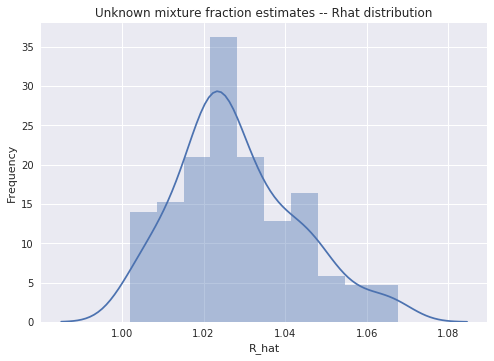

In [37]:
sns.distplot(stan_summary[stan_summary.name.str.startswith('sample2_x')]['R_hat'])
plt.title('Unknown mixture fraction estimates -- Rhat distribution')
plt.ylabel('Frequency')
f2 = plt.gcf()
savefig(f2, 'plots/2.1_oossynthetic_model6.2_markergenes_bysubset_Rhat_sample2-x_dist.pdf', dpi=300)
savefig(f2, 'plots/2.1_oossynthetic_model6.2_markergenes_bysubset_Rhat_sample2-x_dist.png', dpi=300)

# convergence - N_eff

/home/maxim/miniconda3/envs/immuneinf/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


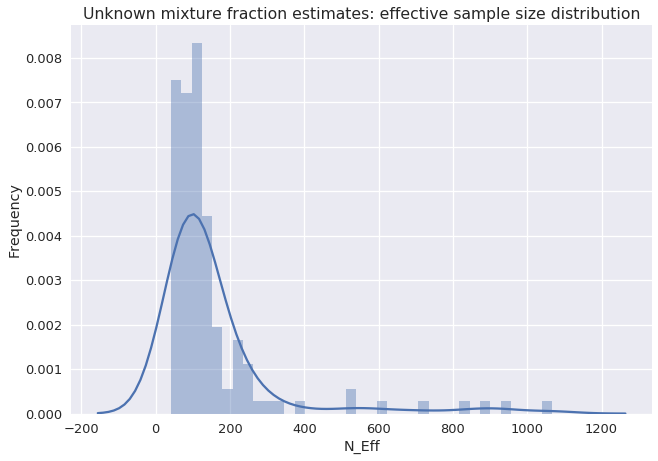

In [225]:
sns.distplot(stan_summary[stan_summary.name.str.startswith('sample2_x')]['N_Eff'])
plt.title('Unknown mixture fraction estimates: effective sample size distribution')
plt.ylabel('Frequency')
f2 = plt.gcf()
savefig(f2, 'plots/2.1_oossynthetic_model6.2_markergenes_bysubset_Neff_sample2-x_dist.pdf', dpi=300)
savefig(f2, 'plots/2.1_oossynthetic_model6.2_markergenes_bysubset_Neff_sample2-x_dist.png', dpi=300)

# convergence -- MCSE and standard deviation

/home/maxim/miniconda3/envs/immuneinf/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


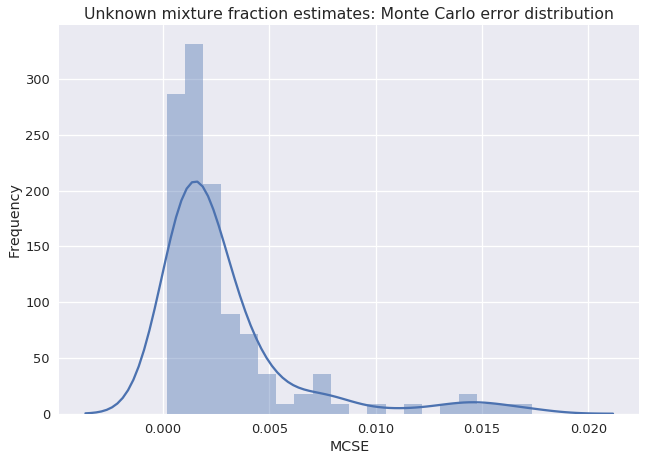

In [226]:
sns.distplot(stan_summary[stan_summary.name.str.startswith('sample2_x')]['MCSE'])
plt.title('Unknown mixture fraction estimates: Monte Carlo error distribution')
plt.ylabel('Frequency')
f2 = plt.gcf()
savefig(f2, 'plots/2.1_oossynthetic_model6.2_markergenes_bysubset_MCSE_sample2-x_dist.pdf', dpi=300)
savefig(f2, 'plots/2.1_oossynthetic_model6.2_markergenes_bysubset_MCSE_sample2-x_dist.png', dpi=300)

/home/maxim/miniconda3/envs/immuneinf/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


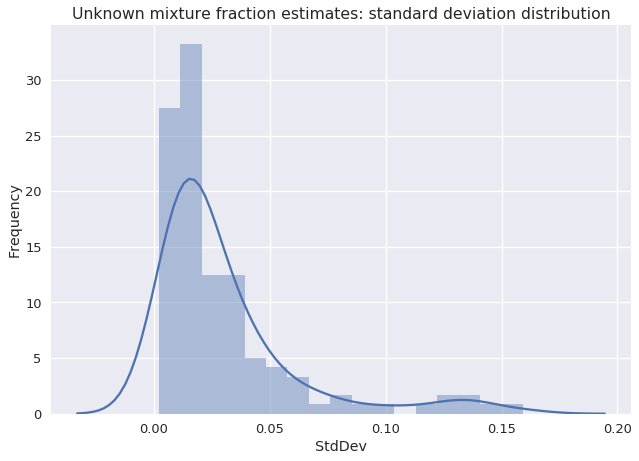

In [227]:
sns.distplot(stan_summary[stan_summary.name.str.startswith('sample2_x')]['StdDev'])
plt.title('Unknown mixture fraction estimates: standard deviation distribution')
plt.ylabel('Frequency')
f2 = plt.gcf()
savefig(f2, 'plots/2.1_oossynthetic_model6.2_markergenes_bysubset_StdDev_sample2-x_dist.pdf', dpi=300)
savefig(f2, 'plots/2.1_oossynthetic_model6.2_markergenes_bysubset_StdDev_sample2-x_dist.png', dpi=300)

# look at deconvolution results, first as means

In [9]:
sample2_xs = stan_summary[stan_summary.name.str.startswith('sample2_x')]['Mean'].values.reshape(10, 13)
sample2_xs.shape

(10, 13)

In [11]:
mixture_estimates = pd.DataFrame(sample2_xs, columns=colnames)
mixture_estimates

,SubSet[B_CD5],SubSet[B_Memory],SubSet[B_Naive],SubSet[CD4_Central_Memory],SubSet[CD4_Effector_Memory],SubSet[CD4_Naive],SubSet[CD4_Th1],SubSet[CD4_Th17],SubSet[CD4_Th2],SubSet[CD4_Treg],SubSet[CD8_Central_Memory],SubSet[CD8_Effector],SubSet[CD8_Naive]
0,0.022161,0.091485,0.853800,0.002476,0.005102,0.004072,0.002338,0.001812,0.003092,0.003781,0.004078,0.002619,0.003183
1,0.016976,0.343933,0.614244,0.006923,0.002584,0.001950,0.003759,0.002707,0.002267,0.001541,0.001102,0.000628,0.001387
2,0.014180,0.237046,0.718953,0.002576,0.001483,0.008254,0.003336,0.003363,0.002982,0.002793,0.002246,0.001597,0.001191
3,0.020100,0.289719,0.660550,0.005772,0.006332,0.003577,0.003233,0.002311,0.001222,0.001943,0.002062,0.001582,0.001597
4,0.017758,0.015184,0.933681,0.003941,0.005588,0.002694,0.004068,0.003493,0.001959,0.004632,0.002777,0.002450,0.001775
5,0.011511,0.374745,0.586005,0.001886,0.004366,0.006138,0.003670,0.001997,0.002428,0.003286,0.001713,0.001085,0.001170
6,0.047302,0.017940,0.364903,0.020591,0.017434,0.010635,0.025022,0.020887,0.010862,0.431693,0.012569,0.008840,0.011321
7,0.065724,0.031598,0.086703,0.027000,0.015378,0.008818,0.020321,0.023268,0.014576,0.671816,0.012842,0.009449,0.012508
8,0.011650,0.209136,0.287414,0.039377,0.011105,0.014087,0.014862,0.015334,0.012040,0.365021,0.007756,0.005637,0.006583
9,0.016857,0.050758,0.252502,0.040189,0.011683,0.010841,0.017893,0.019258,0.013722,0.545714,0.010298,0.003808,0.006477


In [30]:
import re
subset_names = [re.sub(string=x, pattern='(.*)\[(.*)\]', repl='\\2') for x in mixture_estimates.columns]
subset_names

['B_CD5',
 'B_Memory',
 'B_Naive',
 'CD4_Central_Memory',
 'CD4_Effector_Memory',
 'CD4_Naive',
 'CD4_Th1',
 'CD4_Th17',
 'CD4_Th2',
 'CD4_Treg',
 'CD8_Central_Memory',
 'CD8_Effector',
 'CD8_Naive']

In [13]:
for (key, row), (_, groundtruth) in zip(mixture_estimates.iterrows(), stan_data['x2'].iterrows()):
    print(row)
    print(groundtruth)
    print(key)
    break

SubSet[B_CD5]                  0.022161
SubSet[B_Memory]               0.091485
SubSet[B_Naive]                0.853800
SubSet[CD4_Central_Memory]     0.002476
SubSet[CD4_Effector_Memory]    0.005102
SubSet[CD4_Naive]              0.004072
SubSet[CD4_Th1]                0.002338
SubSet[CD4_Th17]               0.001812
SubSet[CD4_Th2]                0.003092
SubSet[CD4_Treg]               0.003781
SubSet[CD8_Central_Memory]     0.004078
SubSet[CD8_Effector]           0.002619
SubSet[CD8_Naive]              0.003183
Name: 0, dtype: float64
SubSet[B_CD5]                  0.0
SubSet[B_Memory]               0.5
SubSet[B_Naive]                0.5
SubSet[CD4_Central_Memory]     0.0
SubSet[CD4_Effector_Memory]    0.0
SubSet[CD4_Naive]              0.0
SubSet[CD4_Th1]                0.0
SubSet[CD4_Th17]               0.0
SubSet[CD4_Th2]                0.0
SubSet[CD4_Treg]               0.0
SubSet[CD8_Central_Memory]     0.0
SubSet[CD8_Effector]           0.0
SubSet[CD8_Naive]              0.0
N

In [19]:
row.keys()

Index(['SubSet[B_CD5]', 'SubSet[B_Memory]', 'SubSet[B_Naive]',
       'SubSet[CD4_Central_Memory]', 'SubSet[CD4_Effector_Memory]',
       'SubSet[CD4_Naive]', 'SubSet[CD4_Th1]', 'SubSet[CD4_Th17]',
       'SubSet[CD4_Th2]', 'SubSet[CD4_Treg]', 'SubSet[CD8_Central_Memory]',
       'SubSet[CD8_Effector]', 'SubSet[CD8_Naive]'],
      dtype='object')

/home/maxim/miniconda3/envs/immuneinf/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


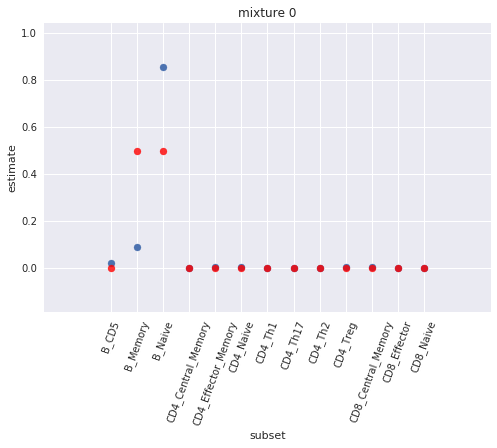

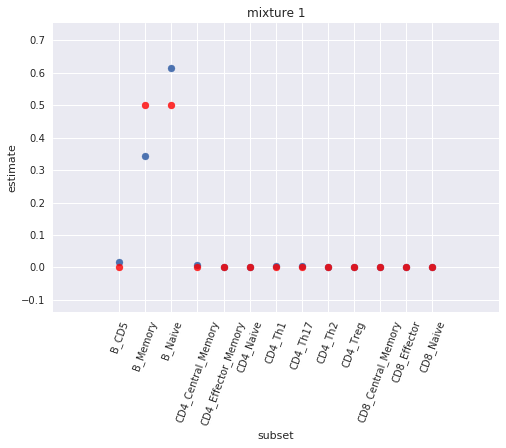

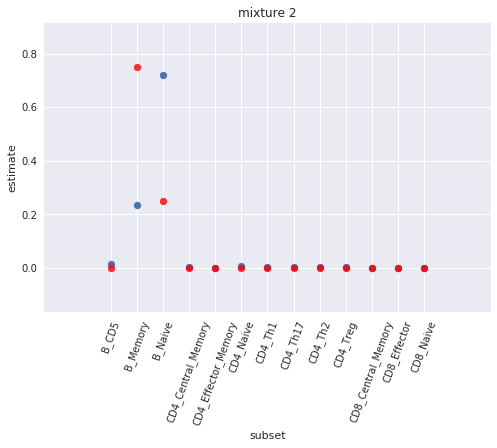

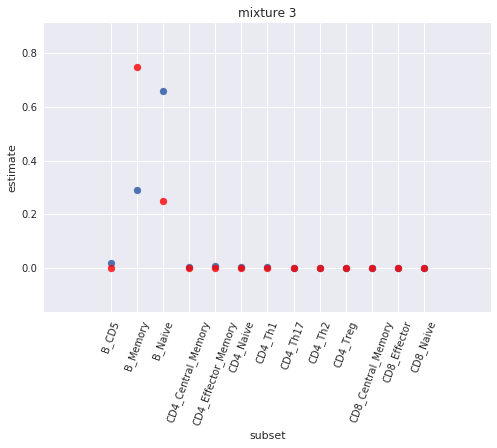

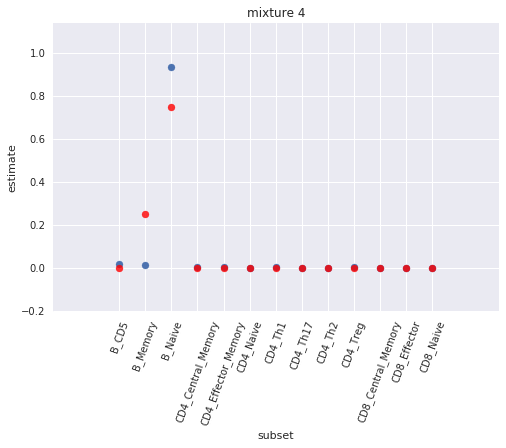

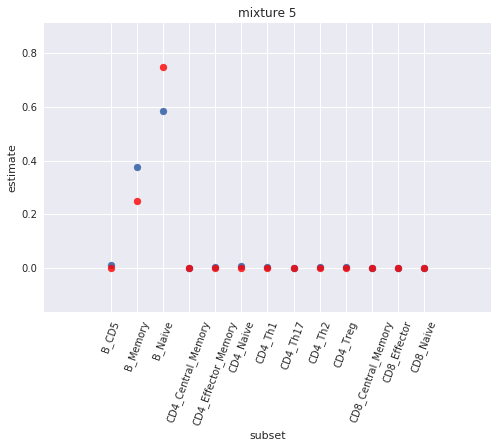

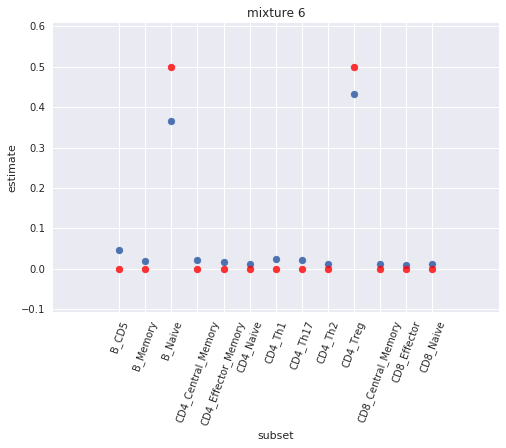

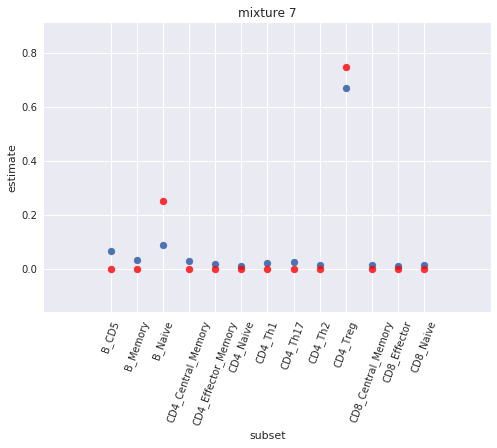

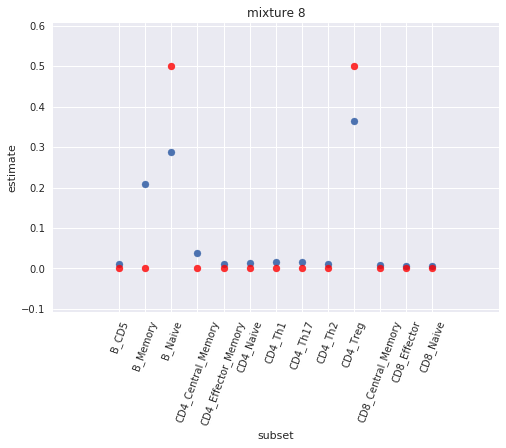

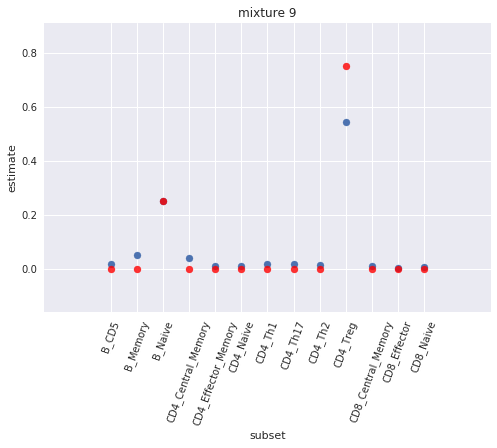

In [33]:
# for now this is just the means
# later we want to use the full distribution
for (key, row), (_, groundtruth) in zip(mixture_estimates.iterrows(), stan_data['x2'].iterrows()):
    f = plt.figure()
    plt.scatter(x=range(len(row.index)), y=row.values)
    plt.title('mixture %d' % key)
    plt.ylabel('estimate')
    plt.xlabel('subset')
    
    # add groundtruth points
    plt.scatter(x=range(len(groundtruth.index)), y=groundtruth.values, color='r', alpha=.8)
    
    #plt.xticks(range(len(row.index)), row.index, rotation='vertical')
    plt.xticks(range(len(row.index)), subset_names, rotation='70')
    # avoid clipping https://matplotlib.org/2.0.0/examples/ticks_and_spines/ticklabels_demo_rotation.html
    plt.margins(0.2)
    plt.subplots_adjust(bottom=0.15)
    
    
    #break

OK these results look pretty interesting. worth plotting the full distributions.

# get the full deconvolution distributions

In [41]:
# have to load in the full traces
cols_we_want = stan_summary[stan_summary.name.str.startswith('sample2_x')].name.values
cols_we_want


array(['sample2_x[1,1]', 'sample2_x[1,2]', 'sample2_x[1,3]',
       'sample2_x[1,4]', 'sample2_x[1,5]', 'sample2_x[1,6]',
       'sample2_x[1,7]', 'sample2_x[1,8]', 'sample2_x[1,9]',
       'sample2_x[1,10]', 'sample2_x[1,11]', 'sample2_x[1,12]',
       'sample2_x[1,13]', 'sample2_x[2,1]', 'sample2_x[2,2]',
       'sample2_x[2,3]', 'sample2_x[2,4]', 'sample2_x[2,5]',
       'sample2_x[2,6]', 'sample2_x[2,7]', 'sample2_x[2,8]',
       'sample2_x[2,9]', 'sample2_x[2,10]', 'sample2_x[2,11]',
       'sample2_x[2,12]', 'sample2_x[2,13]', 'sample2_x[3,1]',
       'sample2_x[3,2]', 'sample2_x[3,3]', 'sample2_x[3,4]',
       'sample2_x[3,5]', 'sample2_x[3,6]', 'sample2_x[3,7]',
       'sample2_x[3,8]', 'sample2_x[3,9]', 'sample2_x[3,10]',
       'sample2_x[3,11]', 'sample2_x[3,12]', 'sample2_x[3,13]',
       'sample2_x[4,1]', 'sample2_x[4,2]', 'sample2_x[4,3]',
       'sample2_x[4,4]', 'sample2_x[4,5]', 'sample2_x[4,6]',
       'sample2_x[4,7]', 'sample2_x[4,8]', 'sample2_x[4,9]',
       'samp

In [43]:
#trace_0 = pd.read_csv('logs/markergenes_sampling_log.txt_0.csv', comment='#', usecols=cols_we_want)
trace_0 = pd.read_csv('logs/markergenes_sampling_log.txt_0.csv', comment='#', nrows=3)
trace_0.columns

Index(['lp__', 'accept_stat__', 'stepsize__', 'treedepth__', 'n_leapfrog__',
       'divergent__', 'energy__', 'Omega_L.1.1', 'Omega_L.2.1', 'Omega_L.3.1',
       ...
       'tau.4.13', 'tau.5.13', 'tau.6.13', 'tau.7.13', 'tau.8.13', 'tau.9.13',
       'tau.10.13', 'tau.11.13', 'tau.12.13', 'tau.13.13'],
      dtype='object', length=145490)

In [45]:
for c in trace_0.columns:
    if c.startswith('sample2_x'):
        print(c)

sample2_x.1.1
sample2_x.2.1
sample2_x.3.1
sample2_x.4.1
sample2_x.5.1
sample2_x.6.1
sample2_x.7.1
sample2_x.8.1
sample2_x.9.1
sample2_x.10.1
sample2_x.1.2
sample2_x.2.2
sample2_x.3.2
sample2_x.4.2
sample2_x.5.2
sample2_x.6.2
sample2_x.7.2
sample2_x.8.2
sample2_x.9.2
sample2_x.10.2
sample2_x.1.3
sample2_x.2.3
sample2_x.3.3
sample2_x.4.3
sample2_x.5.3
sample2_x.6.3
sample2_x.7.3
sample2_x.8.3
sample2_x.9.3
sample2_x.10.3
sample2_x.1.4
sample2_x.2.4
sample2_x.3.4
sample2_x.4.4
sample2_x.5.4
sample2_x.6.4
sample2_x.7.4
sample2_x.8.4
sample2_x.9.4
sample2_x.10.4
sample2_x.1.5
sample2_x.2.5
sample2_x.3.5
sample2_x.4.5
sample2_x.5.5
sample2_x.6.5
sample2_x.7.5
sample2_x.8.5
sample2_x.9.5
sample2_x.10.5
sample2_x.1.6
sample2_x.2.6
sample2_x.3.6
sample2_x.4.6
sample2_x.5.6
sample2_x.6.6
sample2_x.7.6
sample2_x.8.6
sample2_x.9.6
sample2_x.10.6
sample2_x.1.7
sample2_x.2.7
sample2_x.3.7
sample2_x.4.7
sample2_x.5.7
sample2_x.6.7
sample2_x.7.7
sample2_x.8.7
sample2_x.9.7
sample2_x.10.7
sample2_x.1.8

In [47]:
cols_we_want_renamed  = [c.replace('[', '.').replace(']', '').replace(',', '.') for c in cols_we_want]
cols_we_want_renamed

['sample2_x.1.1',
 'sample2_x.1.2',
 'sample2_x.1.3',
 'sample2_x.1.4',
 'sample2_x.1.5',
 'sample2_x.1.6',
 'sample2_x.1.7',
 'sample2_x.1.8',
 'sample2_x.1.9',
 'sample2_x.1.10',
 'sample2_x.1.11',
 'sample2_x.1.12',
 'sample2_x.1.13',
 'sample2_x.2.1',
 'sample2_x.2.2',
 'sample2_x.2.3',
 'sample2_x.2.4',
 'sample2_x.2.5',
 'sample2_x.2.6',
 'sample2_x.2.7',
 'sample2_x.2.8',
 'sample2_x.2.9',
 'sample2_x.2.10',
 'sample2_x.2.11',
 'sample2_x.2.12',
 'sample2_x.2.13',
 'sample2_x.3.1',
 'sample2_x.3.2',
 'sample2_x.3.3',
 'sample2_x.3.4',
 'sample2_x.3.5',
 'sample2_x.3.6',
 'sample2_x.3.7',
 'sample2_x.3.8',
 'sample2_x.3.9',
 'sample2_x.3.10',
 'sample2_x.3.11',
 'sample2_x.3.12',
 'sample2_x.3.13',
 'sample2_x.4.1',
 'sample2_x.4.2',
 'sample2_x.4.3',
 'sample2_x.4.4',
 'sample2_x.4.5',
 'sample2_x.4.6',
 'sample2_x.4.7',
 'sample2_x.4.8',
 'sample2_x.4.9',
 'sample2_x.4.10',
 'sample2_x.4.11',
 'sample2_x.4.12',
 'sample2_x.4.13',
 'sample2_x.5.1',
 'sample2_x.5.2',
 'sample2_x.

In [48]:
trace_0 = pd.read_csv('logs/markergenes_sampling_log.txt_0.csv', comment='#', usecols=cols_we_want_renamed)
trace_0.head()

,sample2_x.1.1,sample2_x.2.1,sample2_x.3.1,sample2_x.4.1,sample2_x.5.1,sample2_x.6.1,sample2_x.7.1,sample2_x.8.1,sample2_x.9.1,sample2_x.10.1,...,sample2_x.1.13,sample2_x.2.13,sample2_x.3.13,sample2_x.4.13,sample2_x.5.13,sample2_x.6.13,sample2_x.7.13,sample2_x.8.13,sample2_x.9.13,sample2_x.10.13
0,0.057694,0.330562,0.038572,0.37165,0.112948,0.371068,0.020478,0.244329,0.035095,0.181299,...,0.017392,0.027256,0.011743,0.004498,0.037842,0.025829,0.094495,0.038397,0.008223,0.005205
1,0.057694,0.330562,0.038572,0.37165,0.112948,0.371068,0.020478,0.244329,0.035095,0.181299,...,0.017392,0.027256,0.011743,0.004498,0.037842,0.025829,0.094495,0.038397,0.008223,0.005205
2,0.057694,0.330562,0.038572,0.37165,0.112948,0.371068,0.020478,0.244329,0.035095,0.181299,...,0.017392,0.027256,0.011743,0.004498,0.037842,0.025829,0.094495,0.038397,0.008223,0.005205
3,0.057694,0.330562,0.038572,0.37165,0.112948,0.371068,0.020478,0.244329,0.035095,0.181299,...,0.017392,0.027256,0.011743,0.004498,0.037842,0.025829,0.094495,0.038397,0.008223,0.005205
4,0.057694,0.330562,0.038572,0.37165,0.112948,0.371068,0.020478,0.244329,0.035095,0.181299,...,0.017392,0.027256,0.011743,0.004498,0.037842,0.025829,0.094495,0.038397,0.008223,0.005205


In [49]:
trace_0.shape

(2000, 130)

In [52]:
trace_0.index

RangeIndex(start=0, stop=2000, step=1)

In [53]:
# load all traces
all_traces = []
for i in range(4):
    print('loading:', i)
    trace_i = pd.read_csv('logs/markergenes_sampling_log.txt_%d.csv' % i, comment='#', usecols=cols_we_want_renamed)
    trace_i['trace_id'] = i
    trace_i['iter'] = trace_i.index
    all_traces.append(trace_i)

loading: 0
loading: 1
loading: 2
loading: 3


In [54]:
all_traces_df = pd.concat(all_traces)
print(all_traces_df.shape)
all_traces_df.head()

(8000, 132)


,sample2_x.1.1,sample2_x.2.1,sample2_x.3.1,sample2_x.4.1,sample2_x.5.1,sample2_x.6.1,sample2_x.7.1,sample2_x.8.1,sample2_x.9.1,sample2_x.10.1,...,sample2_x.3.13,sample2_x.4.13,sample2_x.5.13,sample2_x.6.13,sample2_x.7.13,sample2_x.8.13,sample2_x.9.13,sample2_x.10.13,trace_id,iter
0,0.057694,0.330562,0.038572,0.37165,0.112948,0.371068,0.020478,0.244329,0.035095,0.181299,...,0.011743,0.004498,0.037842,0.025829,0.094495,0.038397,0.008223,0.005205,0,0
1,0.057694,0.330562,0.038572,0.37165,0.112948,0.371068,0.020478,0.244329,0.035095,0.181299,...,0.011743,0.004498,0.037842,0.025829,0.094495,0.038397,0.008223,0.005205,0,1
2,0.057694,0.330562,0.038572,0.37165,0.112948,0.371068,0.020478,0.244329,0.035095,0.181299,...,0.011743,0.004498,0.037842,0.025829,0.094495,0.038397,0.008223,0.005205,0,2
3,0.057694,0.330562,0.038572,0.37165,0.112948,0.371068,0.020478,0.244329,0.035095,0.181299,...,0.011743,0.004498,0.037842,0.025829,0.094495,0.038397,0.008223,0.005205,0,3
4,0.057694,0.330562,0.038572,0.37165,0.112948,0.371068,0.020478,0.244329,0.035095,0.181299,...,0.011743,0.004498,0.037842,0.025829,0.094495,0.038397,0.008223,0.005205,0,4


In [55]:
all_traces_df2 = pd.melt(all_traces_df, id_vars=['iter','trace_id'], value_name='estimate', var_name='variable')
all_traces_df2.head()

,iter,trace_id,variable,estimate
0,0,0,sample2_x.1.1,0.057694
1,1,0,sample2_x.1.1,0.057694
2,2,0,sample2_x.1.1,0.057694
3,3,0,sample2_x.1.1,0.057694
4,4,0,sample2_x.1.1,0.057694


In [65]:
#all_traces_df2['var1'] = all_traces_df2.variable.str.extract('sample2_x.(\d).\d')
var_ids = all_traces_df2.variable.str.extract('sample2_x.(?P<sample_id>\d+).(?P<subset_id>\d+)')
var_ids.head()

/home/maxim/miniconda3/envs/immuneinf/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  


,sample_id,subset_id
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1


In [66]:
all_traces_df3= pd.concat([all_traces_df2, var_ids], axis=1) 
all_traces_df3.head()

,iter,trace_id,variable,estimate,sample_id,subset_id
0,0,0,sample2_x.1.1,0.057694,1,1
1,1,0,sample2_x.1.1,0.057694,1,1
2,2,0,sample2_x.1.1,0.057694,1,1
3,3,0,sample2_x.1.1,0.057694,1,1
4,4,0,sample2_x.1.1,0.057694,1,1


In [69]:
all_traces_df3['subset_id'] = all_traces_df3['subset_id'].astype(int)
all_traces_df3['sample_id'] = all_traces_df3['sample_id'].astype(int)

In [70]:
all_traces_df3['subset_name'] = all_traces_df3.subset_id.apply(lambda i: subset_names[i-1])
all_traces_df3.head()

,iter,trace_id,variable,estimate,sample_id,subset_id,subset_name
0,0,0,sample2_x.1.1,0.057694,1,1,B_CD5
1,1,0,sample2_x.1.1,0.057694,1,1,B_CD5
2,2,0,sample2_x.1.1,0.057694,1,1,B_CD5
3,3,0,sample2_x.1.1,0.057694,1,1,B_CD5
4,4,0,sample2_x.1.1,0.057694,1,1,B_CD5


important : have to drop the warmup samples!

/home/maxim/miniconda3/envs/immuneinf/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


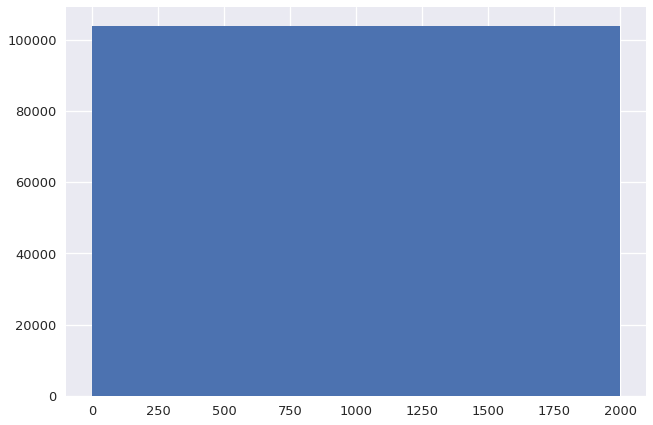

In [174]:
# drop the warmup samples!!!!!

warmup = 1000
all_traces_df3.iter.hist()


In [177]:
all_traces_df3 = all_traces_df3.loc[all_traces_df3['iter']>=1000,]

In [178]:
all_traces_df3['iter'] -= 1000

/home/maxim/miniconda3/envs/immuneinf/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


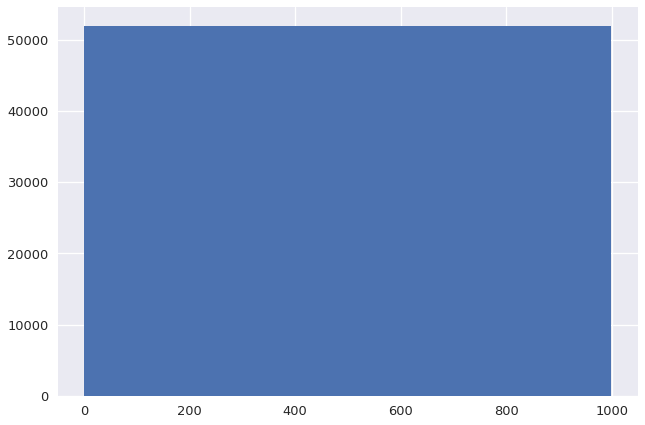

In [179]:
all_traces_df3.iter.hist()

In [180]:
all_traces_df3.tail() # with some later things in the output here

,iter,trace_id,variable,estimate,sample_id,subset_id,subset_name,rollup
1039995,995,3,sample2_x.10.13,0.009689,10,13,CD8_Naive,CD8 T
1039996,996,3,sample2_x.10.13,0.005229,10,13,CD8_Naive,CD8 T
1039997,997,3,sample2_x.10.13,0.007431,10,13,CD8_Naive,CD8 T
1039998,998,3,sample2_x.10.13,0.013489,10,13,CD8_Naive,CD8 T
1039999,999,3,sample2_x.10.13,0.011295,10,13,CD8_Naive,CD8 T


/home/maxim/miniconda3/envs/immuneinf/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


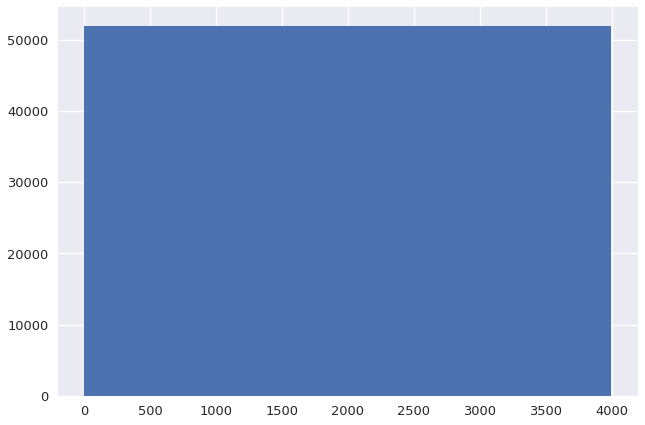

In [181]:
(all_traces_df3['trace_id']*1000 + all_traces_df3['iter']).hist()

In [182]:
# combine iteration numbers across traces -- i.e. line them up from 0 to 4000, not 4 versions of 0 to 1000
all_traces_df3['combined_iter_number'] = (all_traces_df3['trace_id']*1000 + all_traces_df3['iter'])

In [183]:
all_traces_df3.shape

(520000, 9)

In [184]:
all_traces_df3.groupby('sample_id').iter.count()

sample_id
1     52000
2     52000
3     52000
4     52000
5     52000
6     52000
7     52000
8     52000
9     52000
10    52000
Name: iter, dtype: int64

In [186]:
assert all_traces_df3.shape[0] / 10 / 13 / 4 == 1000.

In [187]:
all_traces_df3.groupby(['sample_id', 'subset_name']).estimate.agg(['mean', 'std']) #.mean()

mean       std
sample_id subset_name                            
1         B_CD5                0.018127  0.015600
          B_Memory             0.092370  0.032789
          B_Naive              0.883647  0.032793
          CD4_Central_Memory   0.000568  0.000563
          CD4_Effector_Memory  0.000630  0.000629
          CD4_Naive            0.000394  0.000386
          CD4_Th1              0.000744  0.000741
          CD4_Th17             0.000742  0.000725
          CD4_Th2              0.000643  0.000629
          CD4_Treg             0.000470  0.000460
          CD8_Central_Memory   0.000587  0.000580
          CD8_Effector         0.000497  0.000495
          CD8_Naive            0.000582  0.000593
2         B_CD5                0.007565  0.007545
          B_Memory             0.350467  0.042781
          B_Naive              0.637883  0.042943
          CD4_Central_Memory   0.000413  0.000396
          CD4_Effector_Memory  0.000438  0.000429
          CD4_Naive            0.000292  0.000297
          CD4_Th1              0.000493  0.000486
          CD4_Th17             0.000522  0.000523
          CD4_Th2              0.000436  0.000422
          CD4_Treg             0.000319  0.000325
          CD8_Central_Memory   0.000400  0.000397
          CD8_Effector         0.000327  0.000319
          CD8_Naive            0.000444  0.000434
3         B_CD5                0.013048  0.012253
          B_Memory             0.234645  0.036981
          B_Naive              0.748331  0.037977
          CD4_Central_Memory   0.000380  0.000376
...                                 ...       ...
8         CD4_Treg             0.699412  0.040775
          CD8_Central_Memory   0.011418  0.010597
          CD8_Effector         0.008277  0.007555
          CD8_Naive            0.010043  0.009460
9         B_CD5                0.008716  0.008945
          B_Memory             0.215983  0.042358
          B_Naive              0.294339  0.056145
          CD4_Central_Memory   0.033817  0.032173
          CD4_Effector_Memory  0.006670  0.006758
          CD4_Naive            0.009731  0.009221
          CD4_Th1              0.013335  0.013348
          CD4_Th17             0.014228  0.014344
          CD4_Th2              0.010044  0.009922
          CD4_Treg             0.378903  0.041187
          CD8_Central_Memory   0.006333  0.006256
          CD8_Effector         0.002585  0.002688
          CD8_Naive            0.005315  0.005422
10        B_CD5                0.008624  0.008989
          B_Memory             0.048549  0.029720
          B_Naive              0.260183  0.048983
          CD4_Central_Memory   0.040600  0.037380
          CD4_Effector_Memory  0.007555  0.007924
          CD4_Naive            0.008869  0.008363
          CD4_Th1              0.014613  0.014055
          CD4_Th17             0.017797  0.017602
          CD4_Th2              0.011629  0.011263
          CD4_Treg             0.567559  0.046005
          CD8_Central_Memory   0.006256  0.006402
          CD8_Effector         0.002660  0.002759
          CD8_Naive            0.005108  0.005283

[130 rows x 2 columns]

plots/2.1_oos-mixtures_model6.2_markergenes_subset_mixture1.png


/home/maxim/miniconda3/envs/immuneinf/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


plots/2.1_oos-mixtures_model6.2_markergenes_subset_mixture2.png
plots/2.1_oos-mixtures_model6.2_markergenes_subset_mixture3.png
plots/2.1_oos-mixtures_model6.2_markergenes_subset_mixture4.png
plots/2.1_oos-mixtures_model6.2_markergenes_subset_mixture5.png
plots/2.1_oos-mixtures_model6.2_markergenes_subset_mixture6.png
plots/2.1_oos-mixtures_model6.2_markergenes_subset_mixture7.png
plots/2.1_oos-mixtures_model6.2_markergenes_subset_mixture8.png
plots/2.1_oos-mixtures_model6.2_markergenes_subset_mixture9.png
plots/2.1_oos-mixtures_model6.2_markergenes_subset_mixture10.png


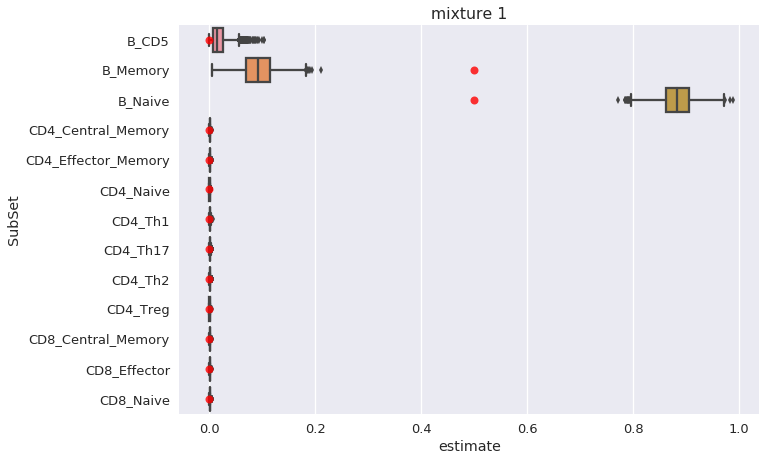

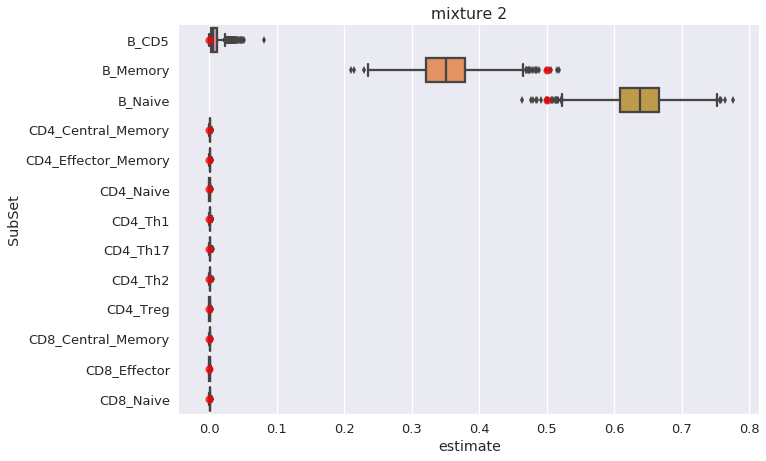

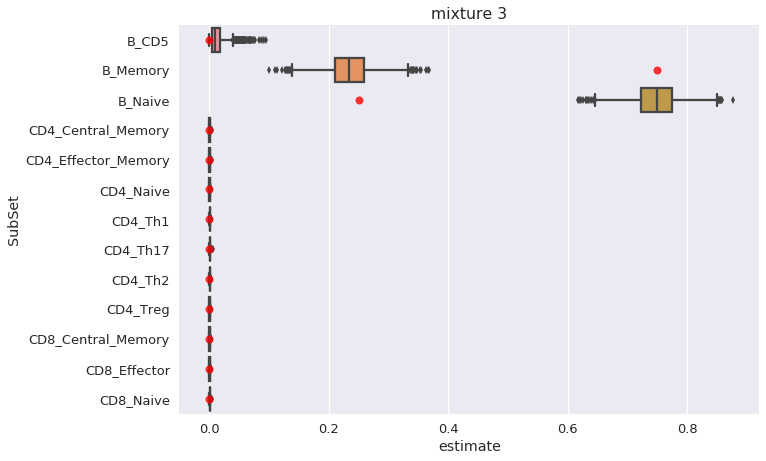

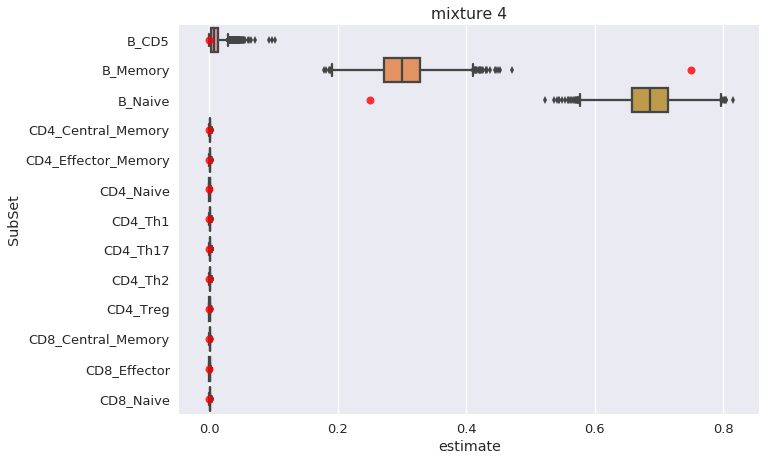

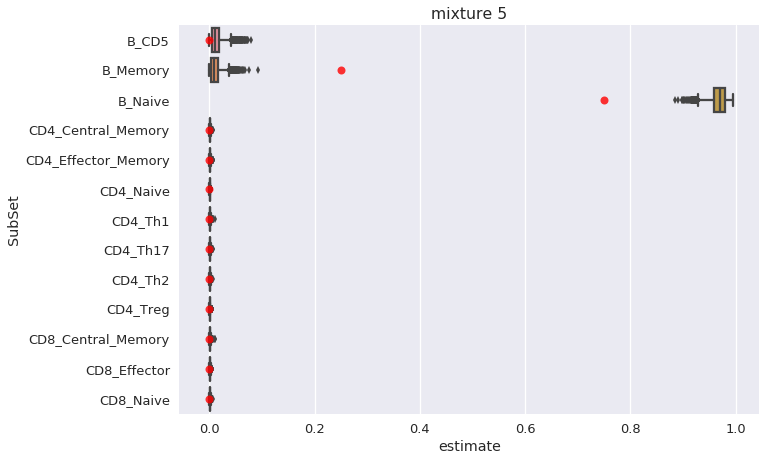

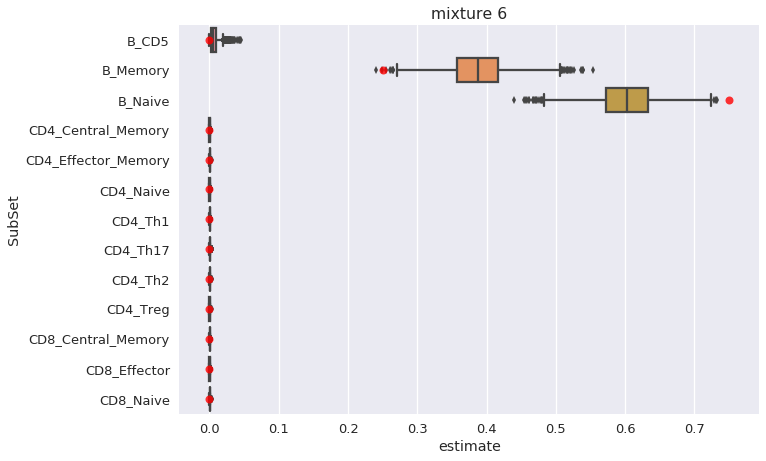

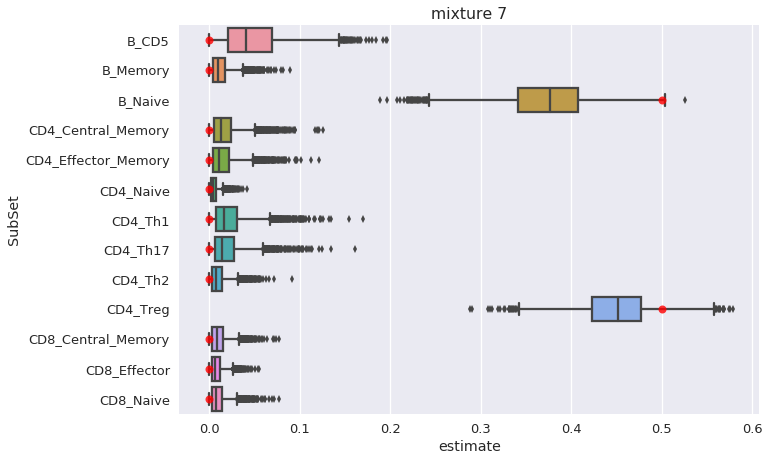

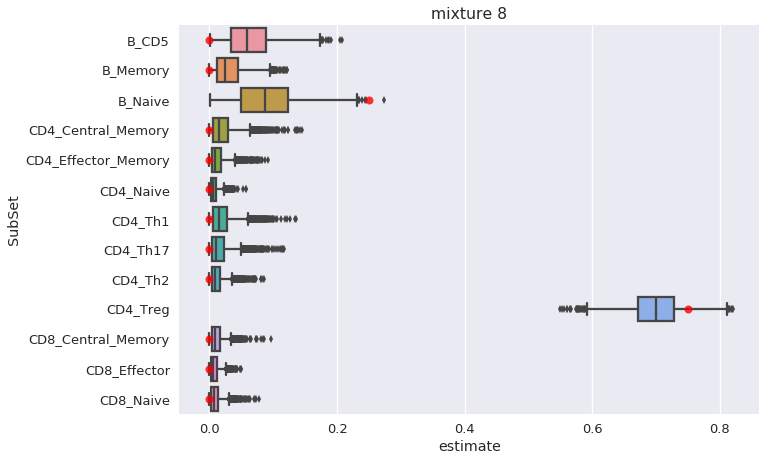

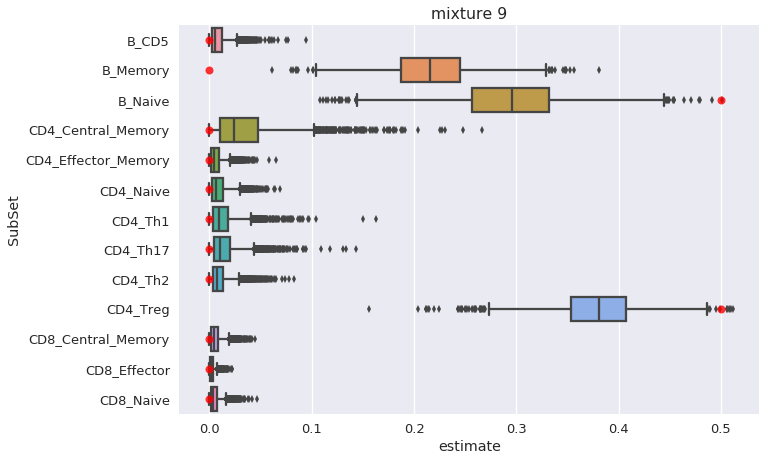

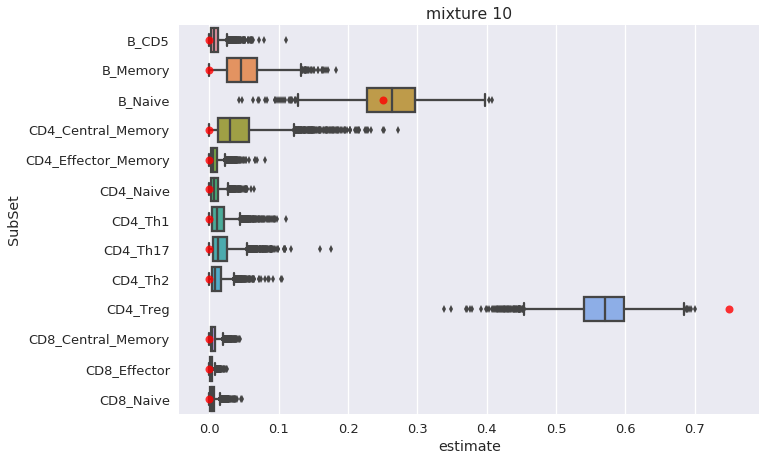

In [188]:
for (key, grp), (_, groundtruth) in zip(all_traces_df3.groupby('sample_id'), stan_data['x2'].iterrows()):
    f = plt.figure()
    g = sns.boxplot(data=grp, y='subset_name', x='estimate')
    g.set_title('mixture %d' % key)
    
    # add groundtruth points
    gt = groundtruth.copy()
    gt.index = [s.replace('SubSet[', '').replace(']', '') for s in gt.index]
    gt = pd.DataFrame(gt).reset_index()
    gt.columns = ['SubSet', 'estimate']
    #print(gt)
    sns.stripplot(x="estimate", y="SubSet", data=gt,
                  linewidth=0,
                  #jitter=True,
                  #size=3,
                  #color=".3",
                  size=8,
                  color="r",
                  alpha=.8
                 )
    fname = 'plots/2.1_oos-mixtures_model6.2_markergenes_subset_mixture%d.png' % key
    print(fname)
    savefig(f, fname, dpi=300)
    #break

/home/maxim/miniconda3/envs/immuneinf/lib/python3.5/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/home/maxim/miniconda3/envs/immuneinf/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


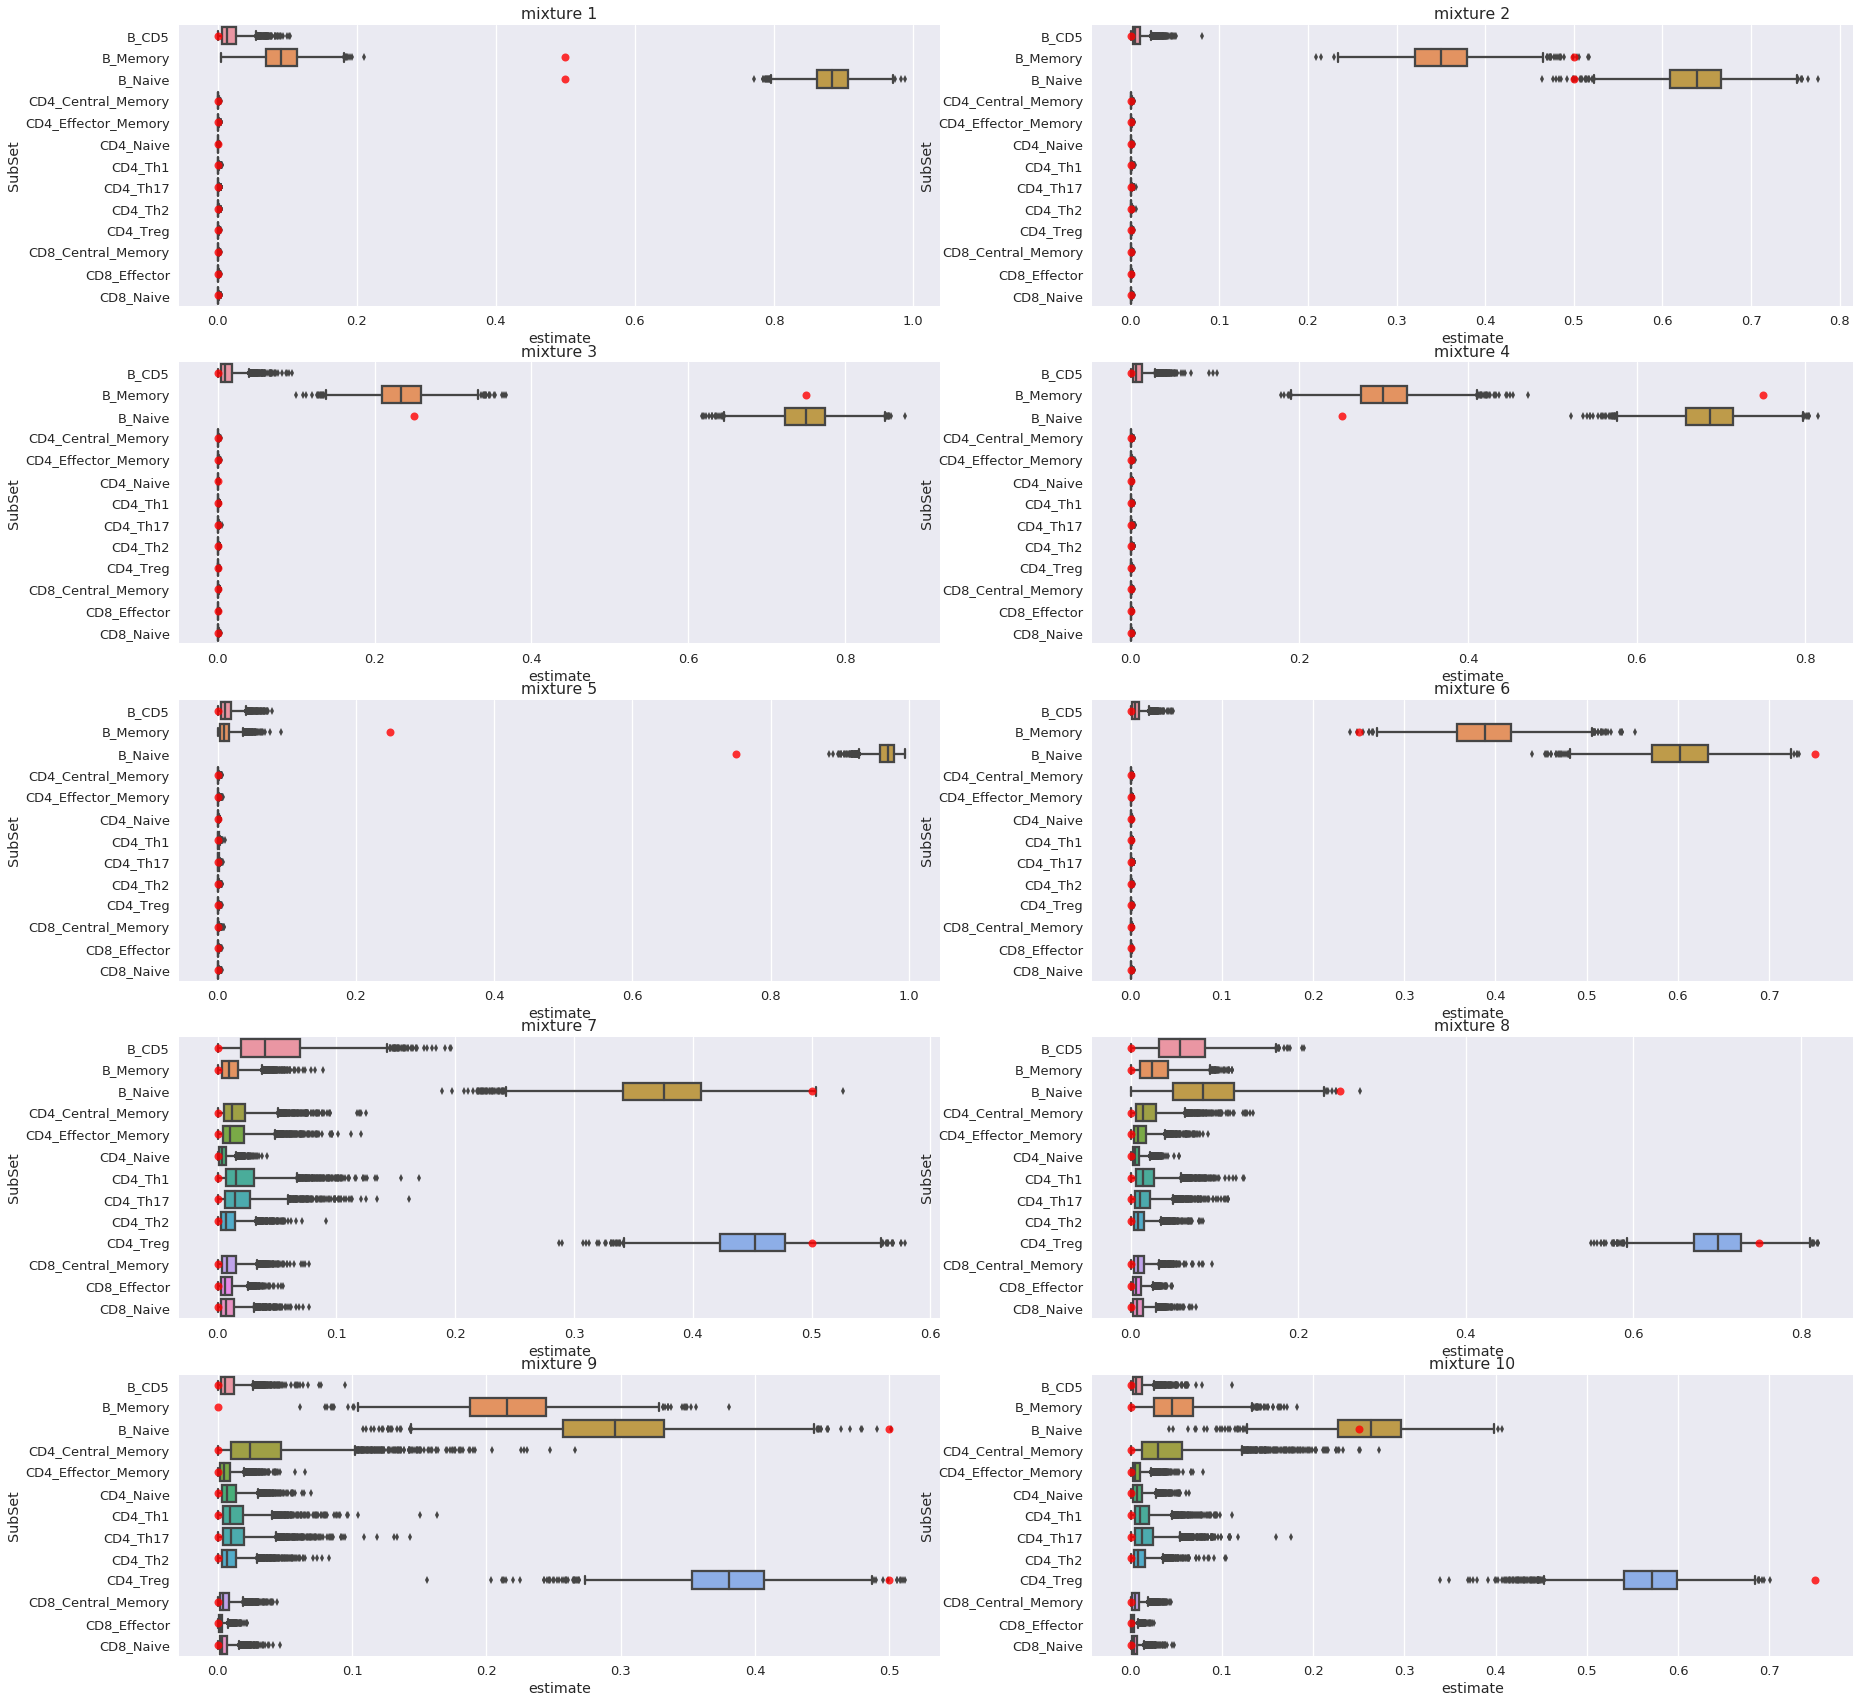

In [190]:
# use subplots
f, ax_arr = plt.subplots(5, 2, figsize=(30,30))

for (key, grp), (_, groundtruth), (axid, ax) in zip(all_traces_df3.groupby('sample_id'),
                                                    stan_data['x2'].iterrows(),
                                                    np.ndenumerate(ax_arr)):
    #plt.figure()
    g = sns.boxplot(data=grp, y='subset_name', x='estimate', ax=ax)
    g.set_title('mixture %d' % key)
    
    # add groundtruth points
    gt = groundtruth.copy()
    gt.index = [s.replace('SubSet[', '').replace(']', '') for s in gt.index]
    gt = pd.DataFrame(gt).reset_index()
    gt.columns = ['SubSet', 'estimate']
    #print(gt)
    sns.stripplot(x="estimate", y="SubSet", data=gt,
                  ax=ax,
                  linewidth=0,
                  #jitter=True,
                  #size=3,
                  #color=".3",
                  size=8,
                  color="r",
                  alpha=.8
                 )
    #break
f.show()
savefig(f, 'plots/2.1_oos-mixtures_model6.2_markergenes_subset_ALL.pdf', dpi=300)

## clean up these plots a bit

In [191]:
friendly_mixture_descriptions = [
    '50% Naive B cell, 50% Memory B cell',
    '50% Naive B cell, 50% Memory B cell (2)',
    '25% Naive B cell, 75% Memory B cell',
    '25% Naive B cell, 75% Memory B cell (2)',
    '75% Naive B cell, 25% Memory B cell',
    '75% Naive B cell, 25% Memory B cell (2)',
    '50% Naive B cell, 50% CD4 Treg cell',
    '25% Naive B cell, 75% CD4 Treg cell',
    '50% Naive B cell, 50% CD4 Treg cell (2)',
    '25% Naive B cell, 75% CD4 Treg cell (2)',
]
len(friendly_mixture_descriptions)

10

In [192]:
import matplotlib.ticker as ticker


In [193]:
sns.axes_style()

{'axes.axisbelow': True,
 'axes.edgecolor': 'white',
 'axes.facecolor': '#EAEAF2',
 'axes.grid': True,
 'axes.labelcolor': '.15',
 'axes.linewidth': 0.0,
 'figure.facecolor': 'white',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'grid.color': 'white',
 'grid.linestyle': '-',
 'image.cmap': 'Greys',
 'legend.frameon': False,
 'legend.numpoints': 1,
 'legend.scatterpoints': 1,
 'lines.solid_capstyle': 'round',
 'text.color': '.15',
 'xtick.color': '.15',
 'xtick.direction': 'out',
 'xtick.major.size': 0.0,
 'xtick.minor.size': 0.0,
 'ytick.color': '.15',
 'ytick.direction': 'out',
 'ytick.major.size': 0.0,
 'ytick.minor.size': 0.0}

In [194]:
sns.set_context('talk')
sns.set_style("darkgrid")

/home/maxim/miniconda3/envs/immuneinf/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


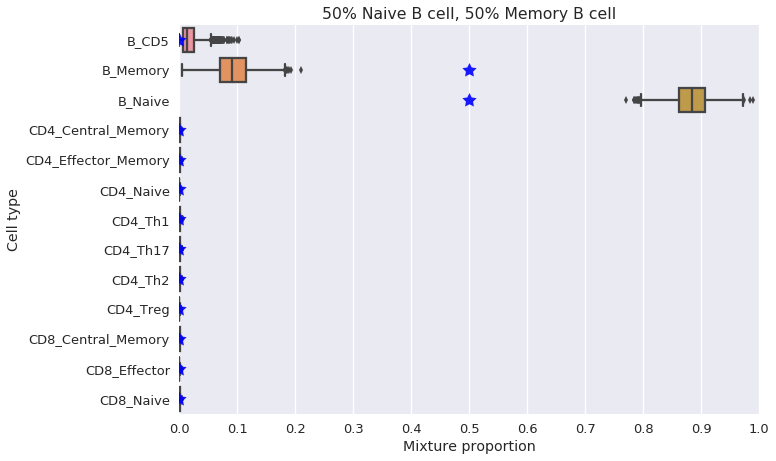

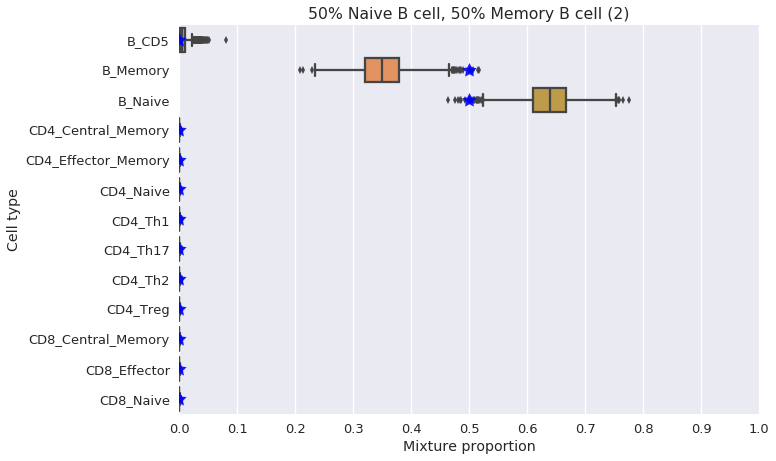

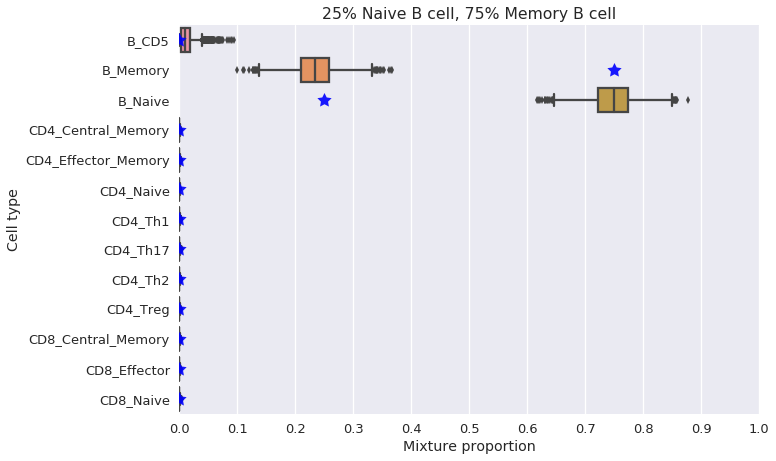

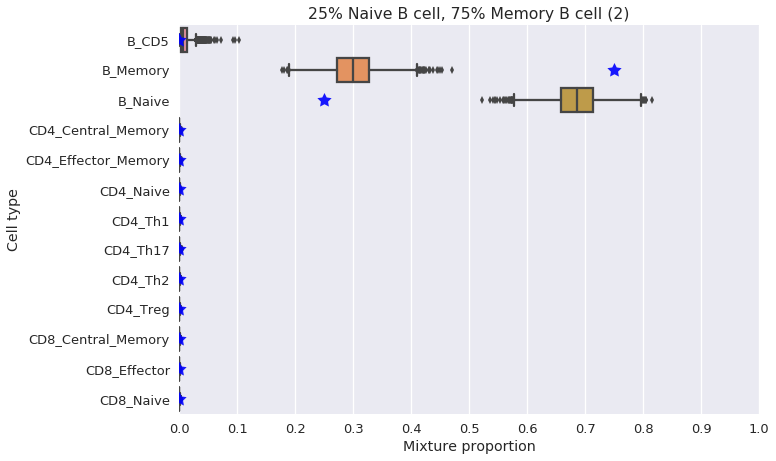

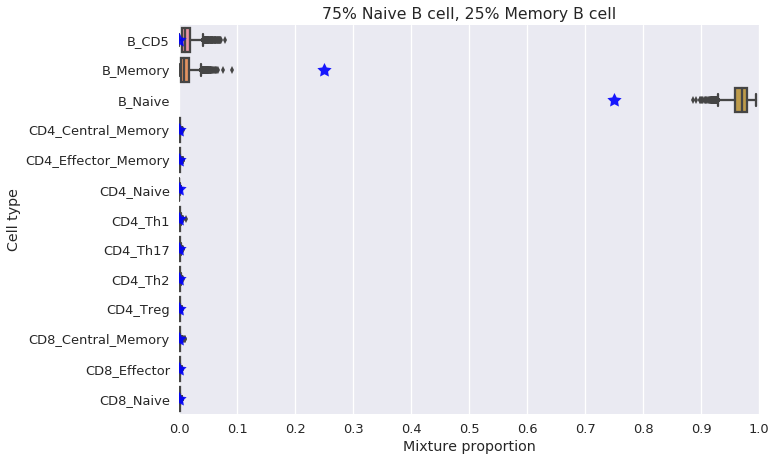

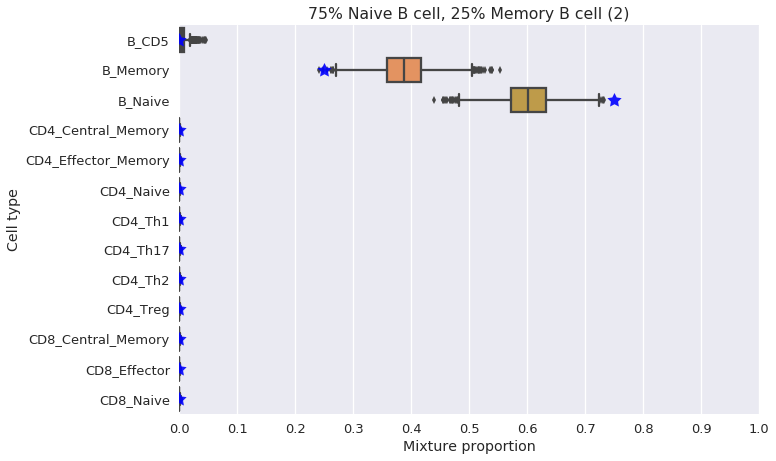

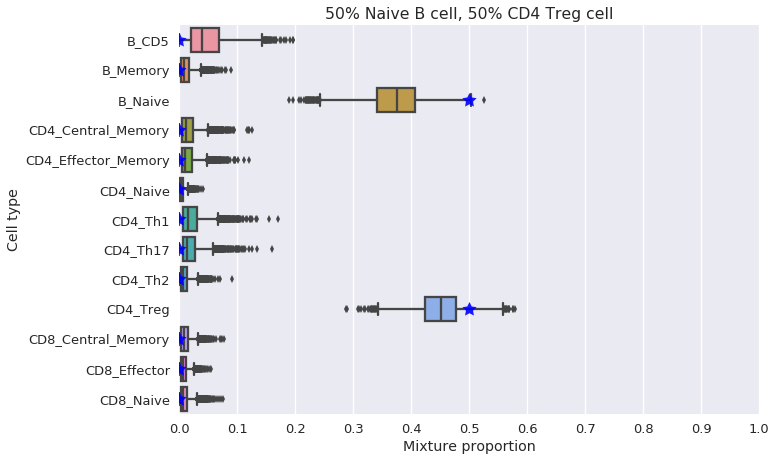

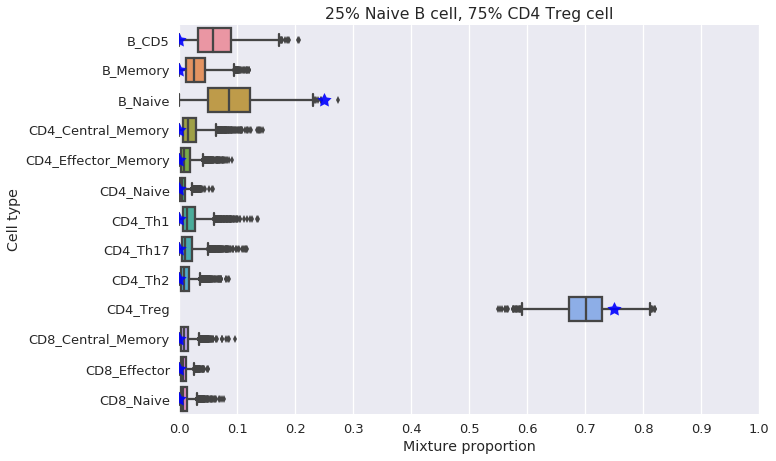

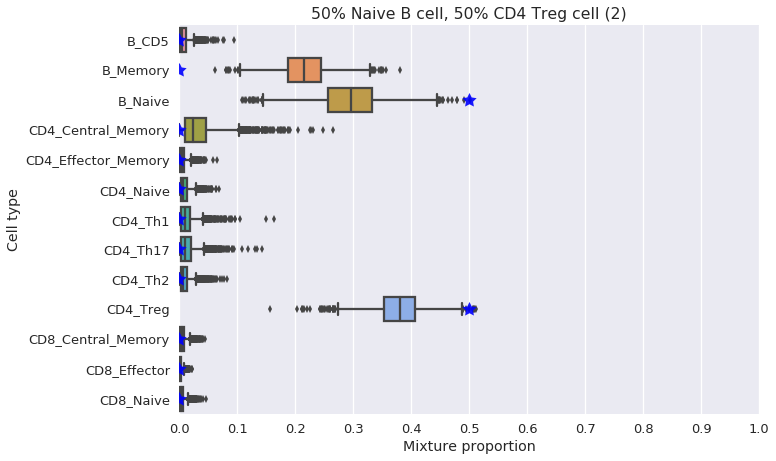

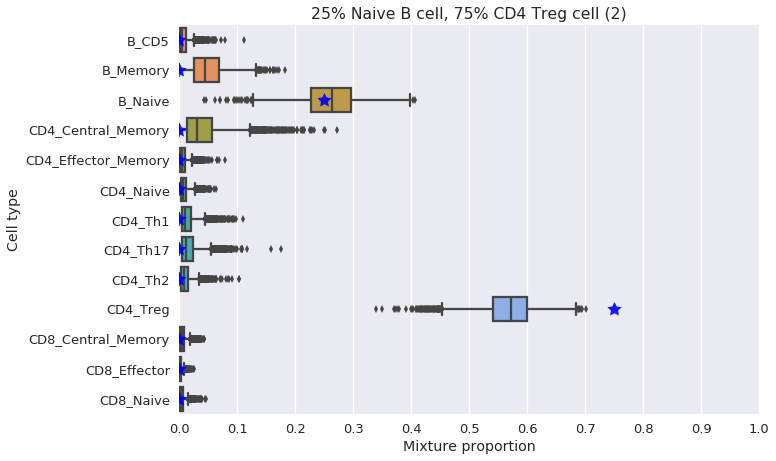

In [195]:
for (key, grp), (_, groundtruth), friendly_title in zip(all_traces_df3.groupby('sample_id'),
                                                        stan_data['x2'].iterrows(),
                                                        friendly_mixture_descriptions
                                                       ):
    f = plt.figure()
    g = sns.boxplot(data=grp, y='subset_name', x='estimate')
    #g.set_title('mixture %d' % key)
    g.set_title(friendly_title)    
    g.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
    
    # add groundtruth points
    gt = groundtruth.copy()
    gt.index = [s.replace('SubSet[', '').replace(']', '') for s in gt.index]
    gt = pd.DataFrame(gt).reset_index()
    gt.columns = ['SubSet', 'estimate']
    #print(gt)
    sns.stripplot(x="estimate", y="SubSet", data=gt,
                  linewidth=0,
                  #jitter=True,
                  #size=3,
                  #color=".3",
                  size=15,
                  #color="r",
                  color='b',
                  alpha=.9,
                  #marker="*",
                  marker=(5, 1),
                 )
    
    g.set_xlabel('Mixture proportion')
    g.set_ylabel('Cell type')
    g.set_xbound(0,1)
    
    savefig(f, 'plots/2.1_oos-mixtures_model6.2_markergenes_subset_mixture%d.cleaner.png' % key, dpi=300)
    savefig(f, 'plots/2.1_oos-mixtures_model6.2_markergenes_subset_mixture%d.cleaner.pdf' % key, dpi=300)
    #break

/home/maxim/miniconda3/envs/immuneinf/lib/python3.5/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/home/maxim/miniconda3/envs/immuneinf/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


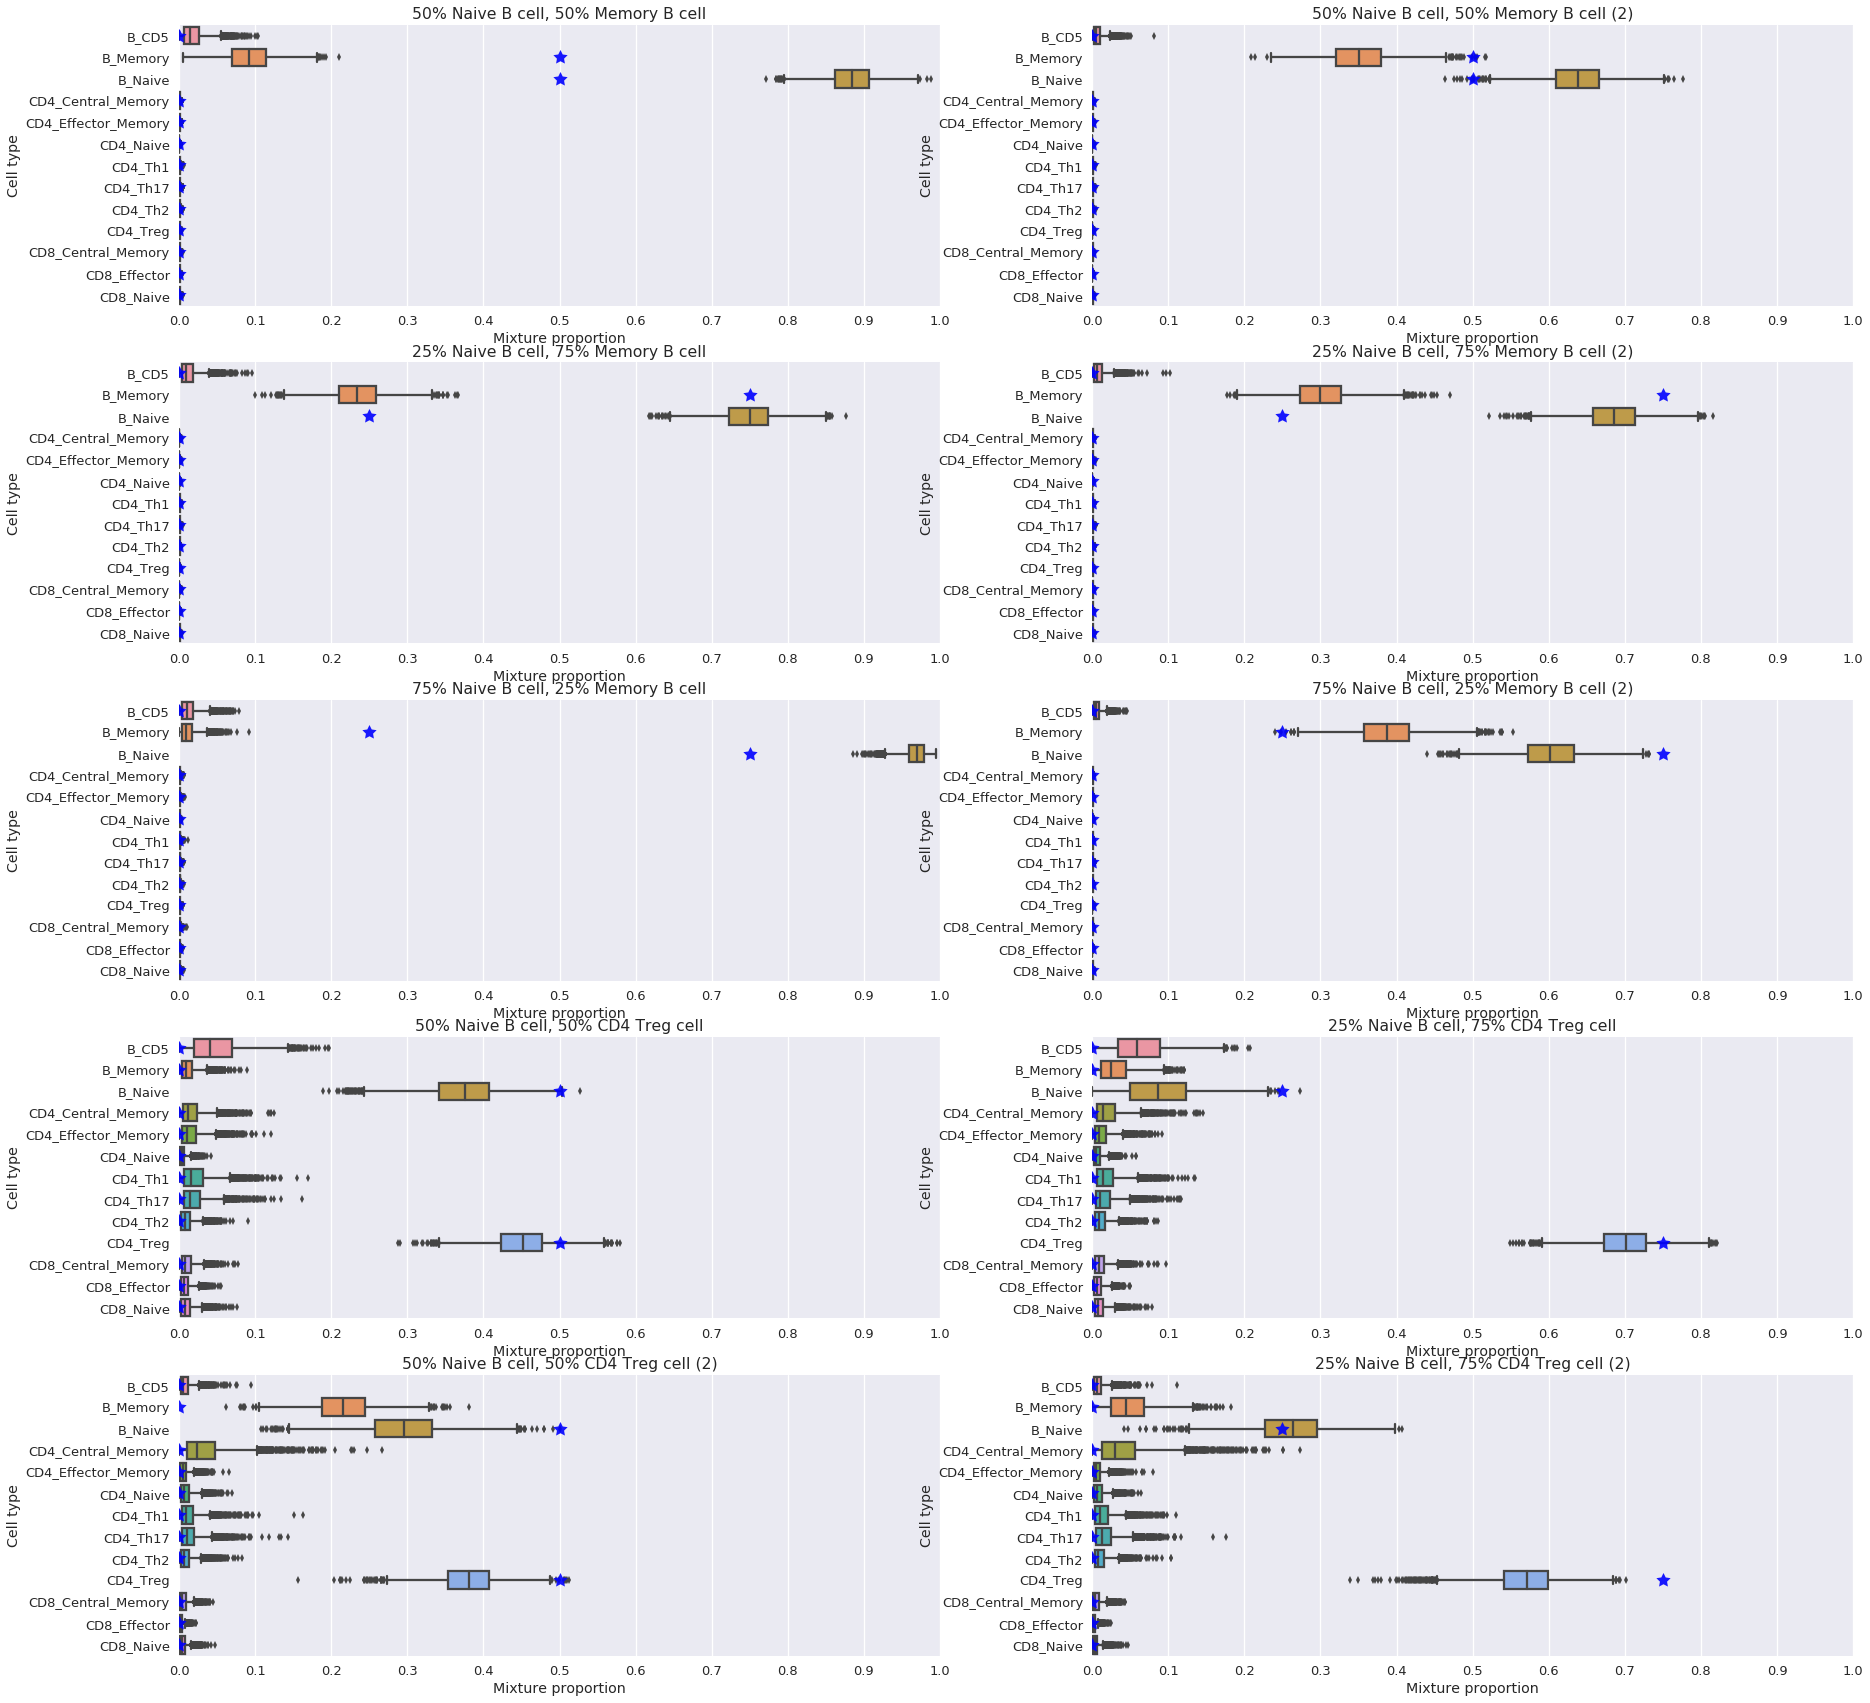

In [215]:
# use subplots
f, ax_arr = plt.subplots(5, 2, figsize=(30,30))

for (key, grp), (_, groundtruth), friendly_title, (axid, ax) in zip(all_traces_df3.groupby('sample_id'),
                                                                    stan_data['x2'].iterrows(),
                                                                    friendly_mixture_descriptions,
                                                                    np.ndenumerate(ax_arr)
                                                                   ):
    g = sns.boxplot(data=grp, y='subset_name', x='estimate', ax=ax)
    #g.set_title('mixture %d' % key)
    g.set_title(friendly_title)    
    g.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
    
    # add groundtruth points
    gt = groundtruth.copy()
    gt.index = [s.replace('SubSet[', '').replace(']', '') for s in gt.index]
    gt = pd.DataFrame(gt).reset_index()
    gt.columns = ['SubSet', 'estimate']
    #print(gt)
    sns.stripplot(x="estimate", y="SubSet", data=gt,
                  ax=ax,
                  linewidth=0,
                  #jitter=True,
                  #size=3,
                  #color=".3",
                  size=15,
                  #color="r",
                  color='b',
                  alpha=.9,
                  #marker="*",
                  marker=(5, 1),
                 )
    
    g.set_xlabel('Mixture proportion')
    g.set_ylabel('Cell type')
    g.set_xbound(0,1)
    
f.show()
savefig(f, 'plots/2.1_oos-mixtures_model6.2_markergenes_subset_ALL.cleaner.pdf', dpi=300)


in first few, why aren't there boxplots visible for every cell type? is that a bug or correct?

/home/maxim/miniconda3/envs/immuneinf/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


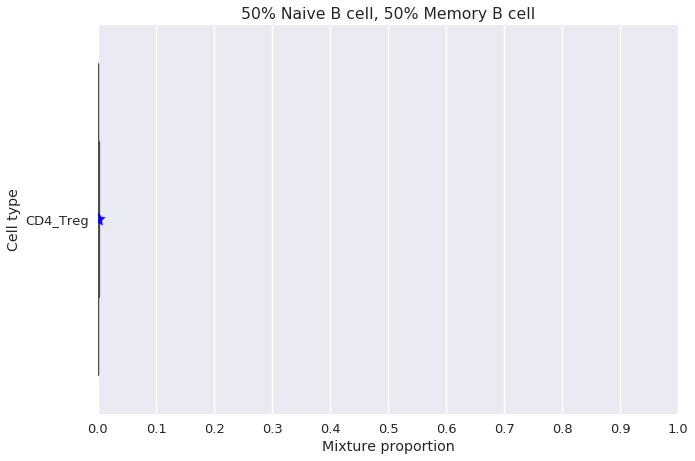

In [197]:
# why don't some of them have boxplots everywhere
for (key, grp2), (_, groundtruth), friendly_title in zip(all_traces_df3.groupby('sample_id'),
                                                        stan_data['x2'].iterrows(),
                                                        friendly_mixture_descriptions
                                                       ):
    grp = grp2[grp2['subset_name'] == 'CD4_Treg'].copy()
    f = plt.figure()
    g = sns.boxplot(data=grp, y='subset_name', x='estimate')
    #g.set_title('mixture %d' % key)
    g.set_title(friendly_title)    
    g.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
    
    # add groundtruth points
    gt = groundtruth[['SubSet[CD4_Treg]']].copy()
    gt.index = [s.replace('SubSet[', '').replace(']', '') for s in gt.index]
    gt = pd.DataFrame(gt).reset_index()
    gt.columns = ['SubSet', 'estimate']
    #print(gt)
    sns.stripplot(x="estimate", y="SubSet", data=gt,
                  linewidth=0,
                  #jitter=True,
                  #size=3,
                  #color=".3",
                  size=15,
                  #color="r",
                  color='b',
                  alpha=.9,
                  #marker="*",
                  marker=(5, 1),
                 )
    
    g.set_xlabel('Mixture proportion')
    g.set_ylabel('Cell type')
    g.set_xbound(0,1)
    
    break

/home/maxim/miniconda3/envs/immuneinf/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


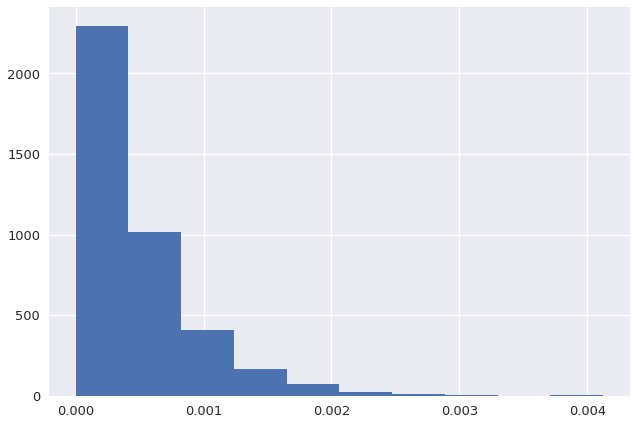

In [198]:
grp.estimate.hist()

seems to be correct. just no distributions there basically

# Roll up by cell type

In [199]:
subset_names

['B_CD5',
 'B_Memory',
 'B_Naive',
 'CD4_Central_Memory',
 'CD4_Effector_Memory',
 'CD4_Naive',
 'CD4_Th1',
 'CD4_Th17',
 'CD4_Th2',
 'CD4_Treg',
 'CD8_Central_Memory',
 'CD8_Effector',
 'CD8_Naive']

In [200]:
rollups = {
    'B': subset_names[:3],
    'CD4 T': subset_names[3:10],
    'CD8 T': subset_names[10:]
}
rollups

{'B': ['B_CD5', 'B_Memory', 'B_Naive'],
 'CD4 T': ['CD4_Central_Memory',
  'CD4_Effector_Memory',
  'CD4_Naive',
  'CD4_Th1',
  'CD4_Th17',
  'CD4_Th2',
  'CD4_Treg'],
 'CD8 T': ['CD8_Central_Memory', 'CD8_Effector', 'CD8_Naive']}

In [216]:
def label_rollup(rollups, x):
    for key in rollups.keys():
        if x in rollups[key]:
            return key
    return None

first, roll up the sampling data.

we want to see the distribution of the sum of all B cell mixture fractions in every iteration (in every chain).

so group by sample ID, superset type, and by iteration (use `combined_iter_number` so we groupby chain too essentially), then sum the estimates. (note that `trace_id` is basically chain ID)

In [201]:
all_traces_df3['rollup'] = all_traces_df3.subset_name.apply(lambda x: label_rollup(rollups, x))

In [217]:
all_traces_df3.rollup.value_counts()

CD4 T    280000
B        120000
CD8 T    120000
Name: rollup, dtype: int64

In [218]:
all_traces_df3.head()

,iter,trace_id,variable,estimate,sample_id,subset_id,subset_name,rollup,combined_iter_number
1000,0,0,sample2_x.1.1,0.011898,1,1,B_CD5,B,0
1001,1,0,sample2_x.1.1,0.013652,1,1,B_CD5,B,1
1002,2,0,sample2_x.1.1,0.022525,1,1,B_CD5,B,2
1003,3,0,sample2_x.1.1,0.017987,1,1,B_CD5,B,3
1004,4,0,sample2_x.1.1,0.002335,1,1,B_CD5,B,4


In [219]:
all_traces_df3.groupby(['sample_id', 'combined_iter_number', 'rollup']).estimate.sum().shape

(120000,)

In [221]:
samples_rolledup = all_traces_df3.groupby(['sample_id', 'combined_iter_number', 'rollup']).estimate.sum().reset_index()

In [222]:
samples_rolledup.head()

,sample_id,combined_iter_number,rollup,estimate
0,1,0,B,0.993695
1,1,0,CD4 T,0.003706
2,1,0,CD8 T,0.002599
3,1,1,B,0.993381
4,1,1,CD4 T,0.003743


now roll up ground truth: sum the subset fractions for every sample into B, CD8 T, CD4 groups:

In [203]:
groundtruth_df = stan_data['x2'].copy()
groundtruth_df['mixID'] = range(len(groundtruth_df))
groundtruth_df

,SubSet[B_CD5],SubSet[B_Memory],SubSet[B_Naive],SubSet[CD4_Central_Memory],SubSet[CD4_Effector_Memory],SubSet[CD4_Naive],SubSet[CD4_Th1],SubSet[CD4_Th17],SubSet[CD4_Th2],SubSet[CD4_Treg],SubSet[CD8_Central_Memory],SubSet[CD8_Effector],SubSet[CD8_Naive],mixID
0,0.0,0.50,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0
0,0.0,0.50,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,1
0,0.0,0.75,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,2
0,0.0,0.75,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,3
0,0.0,0.25,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,4
0,0.0,0.25,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,5
0,0.0,0.00,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.50,0.0,0.0,0.0,6
0,0.0,0.00,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.75,0.0,0.0,0.0,7
0,0.0,0.00,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.50,0.0,0.0,0.0,8
0,0.0,0.00,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.75,0.0,0.0,0.0,9


In [204]:
groundtruth_df_2 = pd.melt(groundtruth_df, id_vars=['mixID'], var_name='subset', value_name='estimate')
print(groundtruth_df_2.shape)
groundtruth_df_2['subset'] = groundtruth_df_2['subset'].apply(lambda x: re.sub(string=x, pattern='(.*)\[(.*)\]', repl='\\2'))
groundtruth_df_2['rollup'] = groundtruth_df_2.subset.apply(lambda x: label_rollup(rollups, x))
groundtruth_df_2.head()

(130, 3)


,mixID,subset,estimate,rollup
0,0,B_CD5,0.0,B
1,1,B_CD5,0.0,B
2,2,B_CD5,0.0,B
3,3,B_CD5,0.0,B
4,4,B_CD5,0.0,B


In [205]:
rollup_groundtruth = groundtruth_df_2.groupby(['mixID', 'rollup']).estimate.sum().reset_index()
rollup_groundtruth.head()

,mixID,rollup,estimate
0,0,B,1.0
1,0,CD4 T,0.0
2,0,CD8 T,0.0
3,1,B,1.0
4,1,CD4 T,0.0


/home/maxim/miniconda3/envs/immuneinf/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


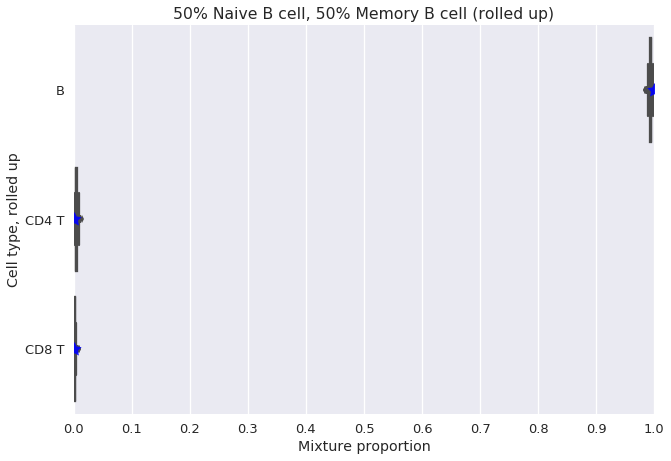

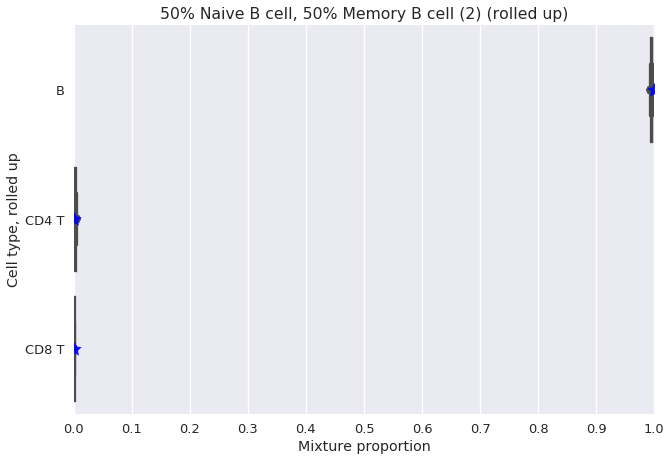

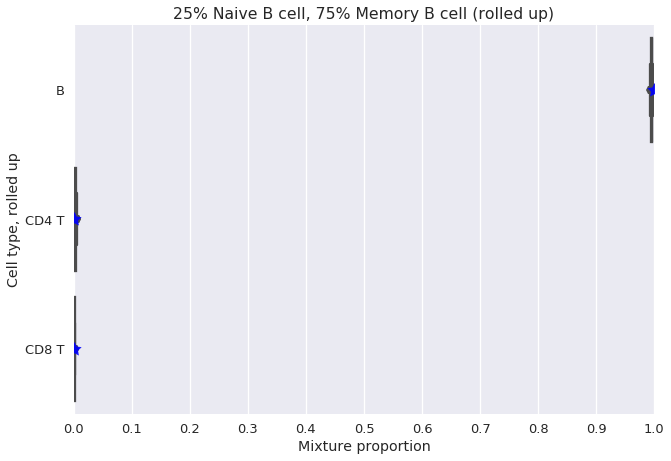

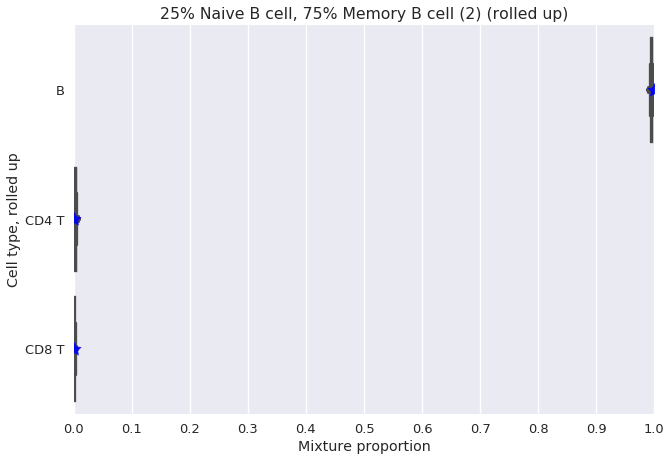

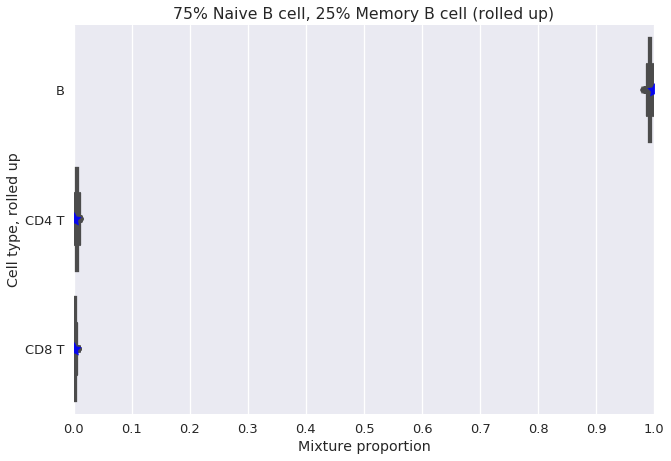

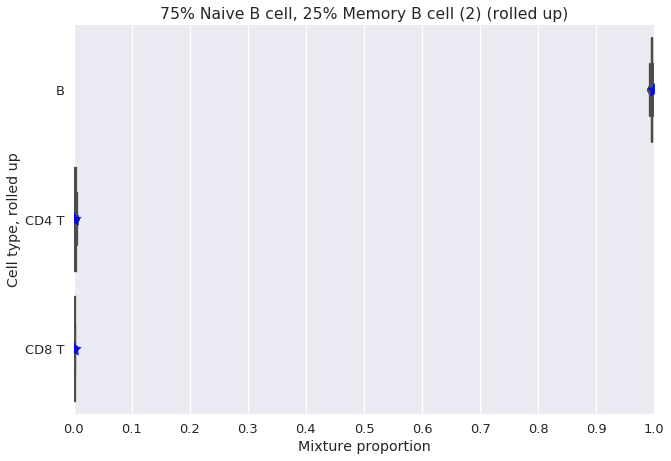

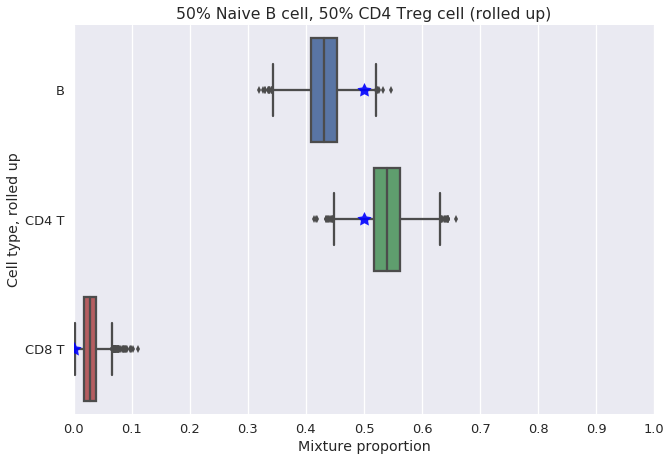

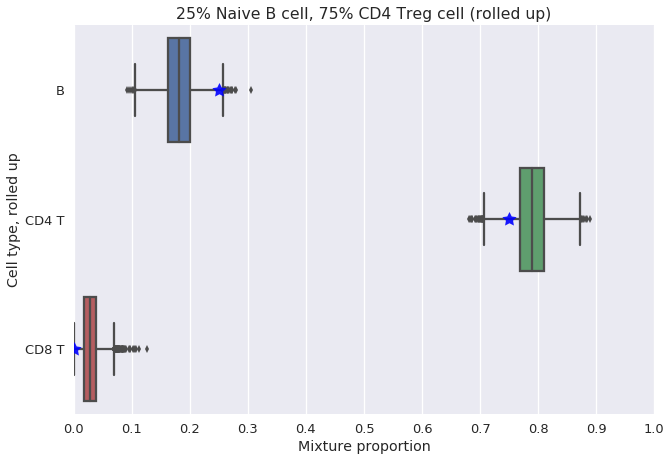

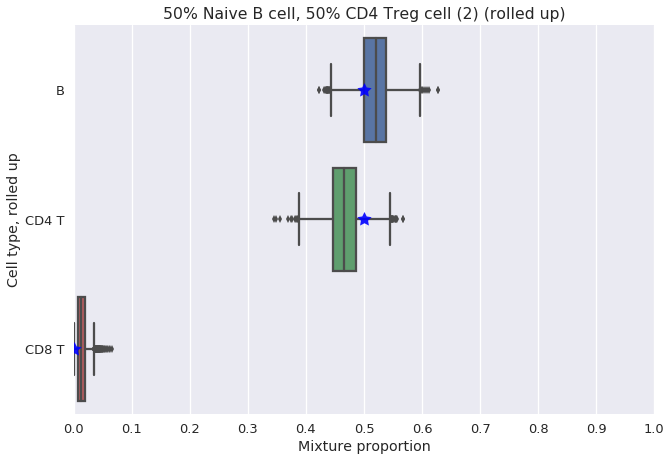

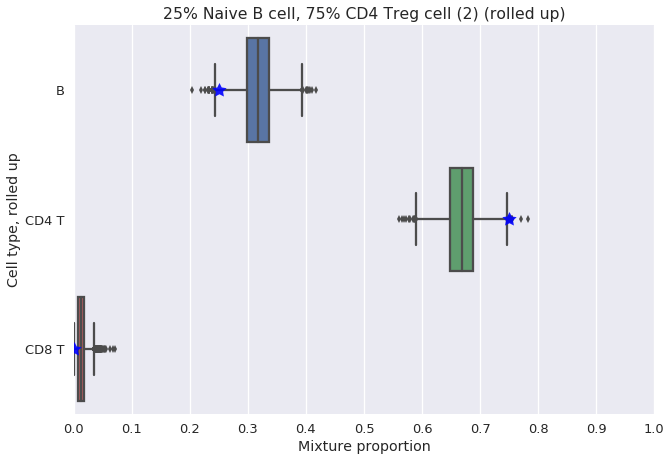

In [223]:
for (key, grp), (mixID, groundtruth), friendly_title in zip(samples_rolledup.groupby('sample_id'),
                                                        rollup_groundtruth.groupby('mixID'),
                                                        friendly_mixture_descriptions
                                                       ):
    f = plt.figure()
    #g = sns.boxplot(data=grp, y='subset_name', x='estimate')
    g = sns.boxplot(data=grp, y='rollup', x='estimate')
    #g.set_title('mixture %d' % key)
    g.set_title(friendly_title + ' (rolled up)')    
    g.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
    
    # add groundtruth points
    sns.stripplot(x="estimate", y="rollup", data=groundtruth,
                  linewidth=0,
                  #jitter=True,
                  #size=3,
                  #color=".3",
                  size=15,
                  #color="r",
                  color='b',
                  alpha=.9,
                  #marker="*",
                  marker=(5, 1),
                 )
    
    g.set_xlabel('Mixture proportion')
    g.set_ylabel('Cell type, rolled up')
    g.set_xbound(0,1)
    
    savefig(f, 'plots/2.1_oos-mixtures_model6.2_markergenes_subset_mixture%d.cleaner.rollup.png' % key, dpi=300)
    savefig(f, 'plots/2.1_oos-mixtures_model6.2_markergenes_subset_mixture%d.cleaner.rollup.pdf' % key, dpi=300)
    #break

# traceplots

In [207]:
# see https://github.com/stan-dev/pystan/blob/develop/pystan/plots.py
# see https://github.com/stan-dev/pystan/blob/develop/pystan/stanfit4model.pyx#L487
# see https://pymc-devs.github.io/pymc3/notebooks/getting_started.html#Posterior-analysis
# see https://github.com/pymc-devs/pymc3/blob/master/pymc3/plots/traceplot.py
from pystan.external.pymc import plots

In [208]:
all_traces_df3.head()

,iter,trace_id,variable,estimate,sample_id,subset_id,subset_name,rollup,combined_iter_number
1000,0,0,sample2_x.1.1,0.011898,1,1,B_CD5,B,0
1001,1,0,sample2_x.1.1,0.013652,1,1,B_CD5,B,1
1002,2,0,sample2_x.1.1,0.022525,1,1,B_CD5,B,2
1003,3,0,sample2_x.1.1,0.017987,1,1,B_CD5,B,3
1004,4,0,sample2_x.1.1,0.002335,1,1,B_CD5,B,4


/home/maxim/miniconda3/envs/immuneinf/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


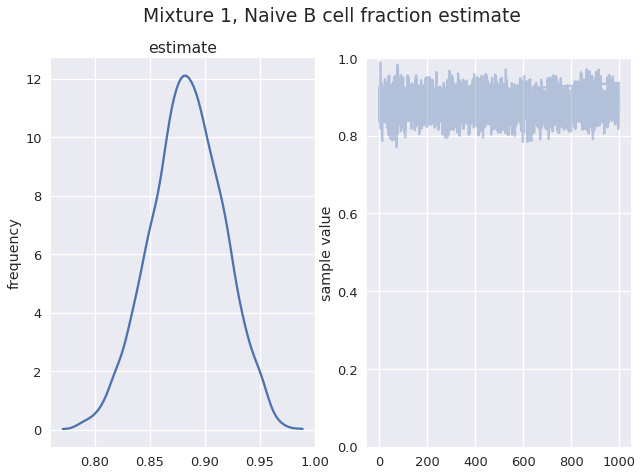

In [230]:
g = plots.traceplot(all_traces_df3[(all_traces_df3['sample_id'] == 1) & (all_traces_df3['subset_name'] == 'B_Naive')]\
                    .set_index('iter')[['estimate']], vars=['estimate'])
g.suptitle('Mixture 1, Naive B cell fraction estimate')
g.gca().set_ylim(0,1)
savefig(g, 'plots/2.1_markergenes_traceplot_mix1_naiveB.png', dpi=300)
savefig(g, 'plots/2.1_markergenes_traceplot_mix1_naiveB.pdf', dpi=300)

/home/maxim/miniconda3/envs/immuneinf/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


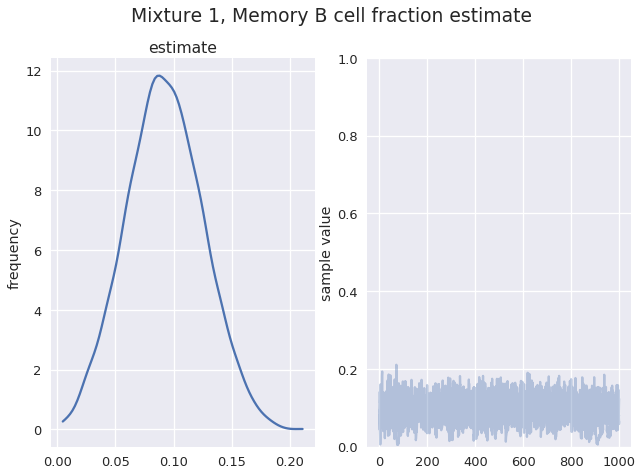

In [231]:
g = plots.traceplot(all_traces_df3[(all_traces_df3['sample_id'] == 1) & (all_traces_df3['subset_name'] == 'B_Memory')]\
                    .set_index('iter')[['estimate']], vars=['estimate'])
g.suptitle('Mixture 1, Memory B cell fraction estimate')
g.gca().set_ylim(0,1)
savefig(g, 'plots/2.1_markergenes_traceplot_mix1_memoryB.png', dpi=300)
savefig(g, 'plots/2.1_markergenes_traceplot_mix1_memoryB.pdf', dpi=300)

/home/maxim/miniconda3/envs/immuneinf/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


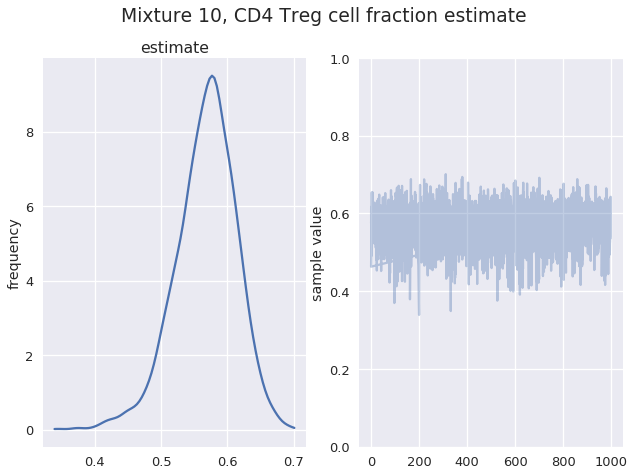

In [232]:
g = plots.traceplot(all_traces_df3[(all_traces_df3['sample_id'] == 10) & (all_traces_df3['subset_name'] == 'CD4_Treg')]\
                    .set_index('iter')[['estimate']], vars=['estimate'])
g.suptitle('Mixture 10, CD4 Treg cell fraction estimate')
g.gca().set_ylim(0,1)
savefig(g, 'plots/2.1_markergenes_traceplot_mix01_Treg.png', dpi=300)
savefig(g, 'plots/2.1_markergenes_traceplot_mix10_Treg.pdf', dpi=300)

note that we ensure above that we don't use the index column as x axis, and instead use iter. that way the chains are combined